In [25]:
import CM.covariance as CV
import numpy as np
from tqdm import tqdm

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

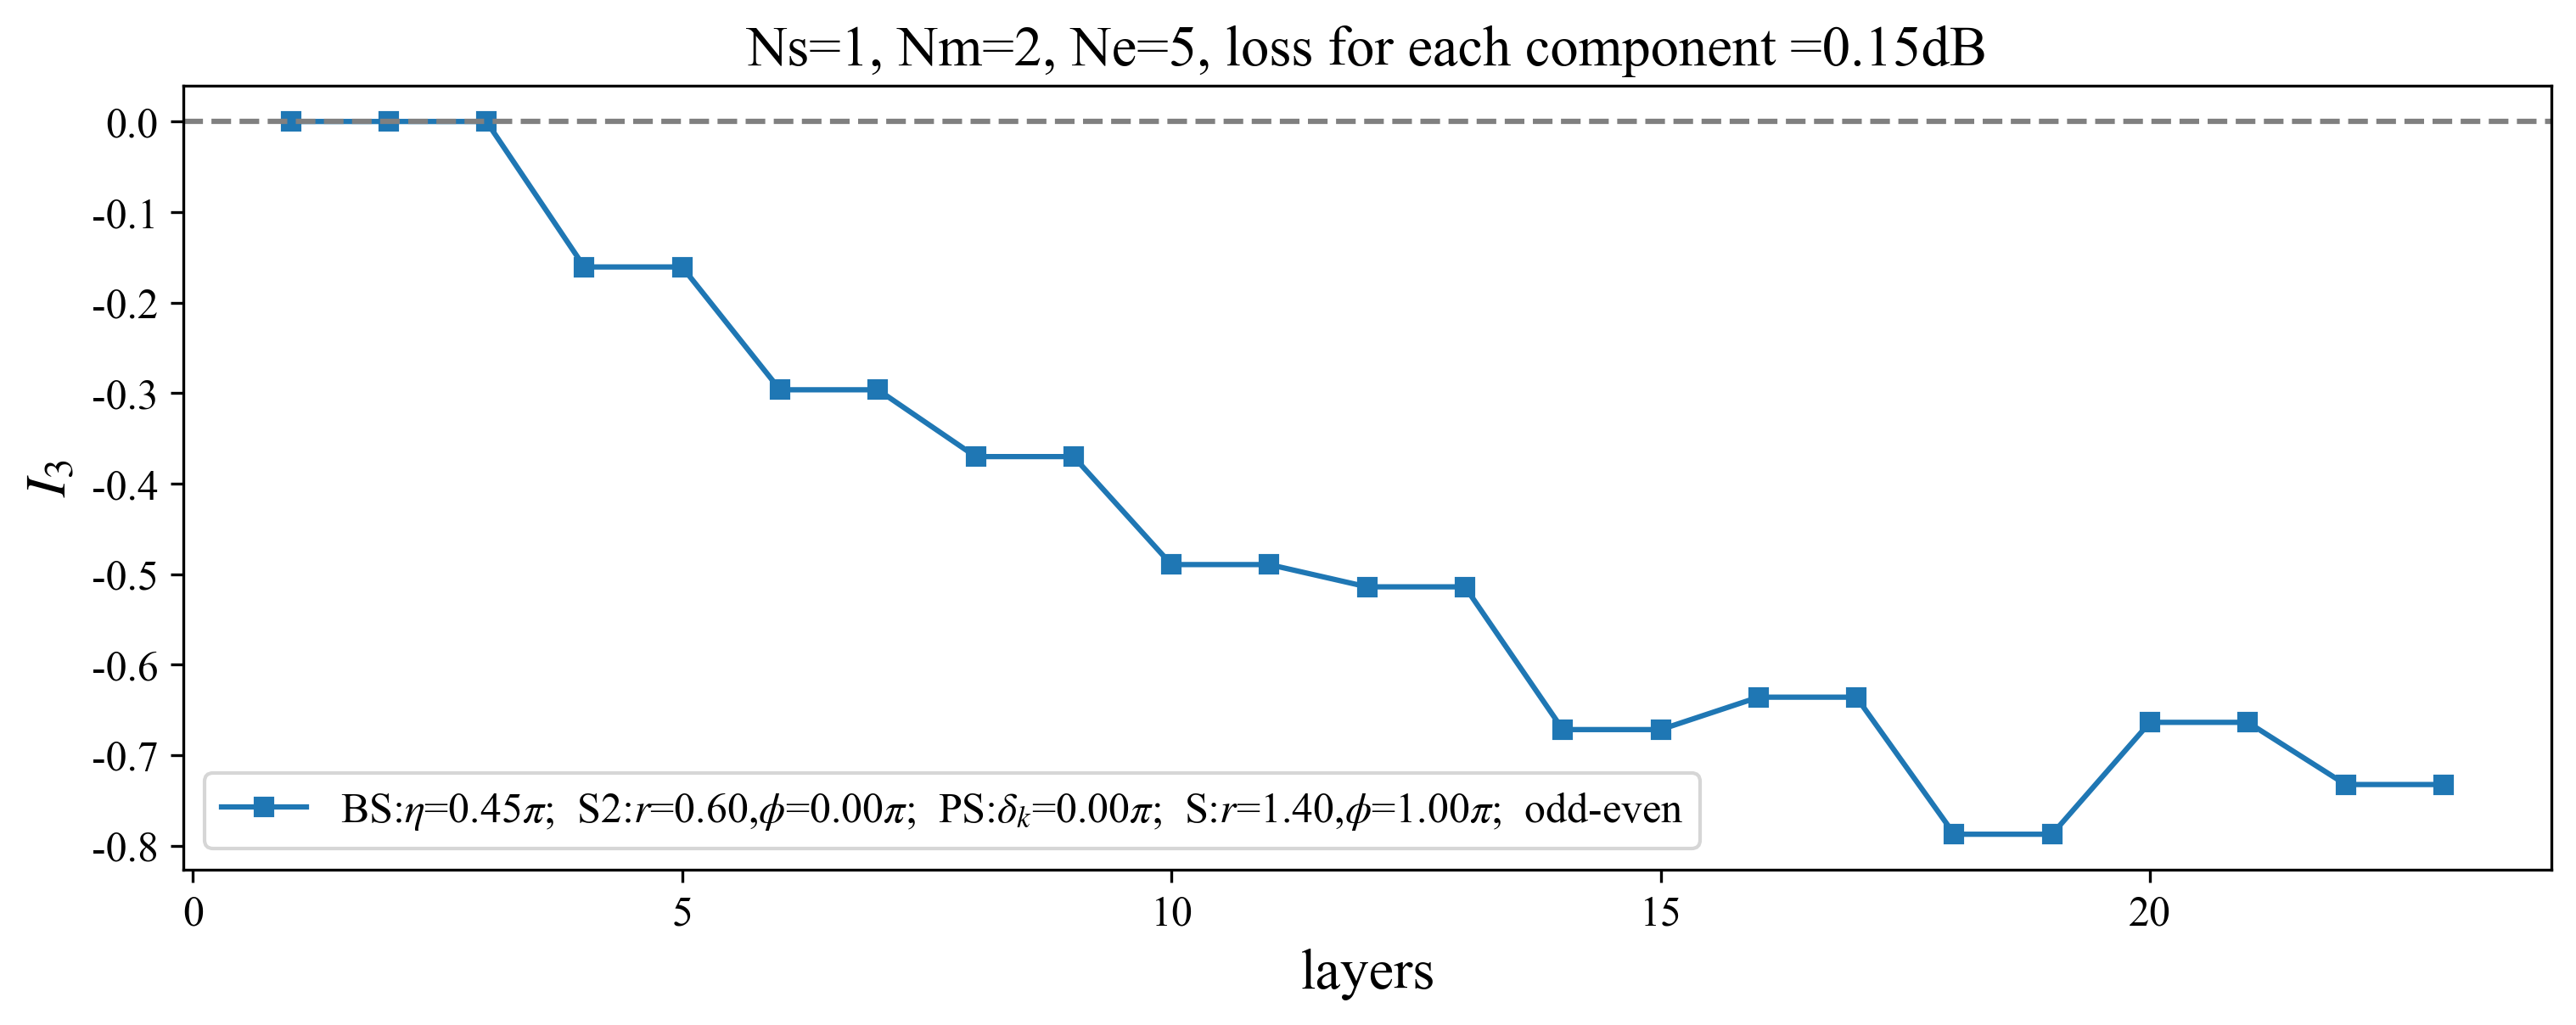

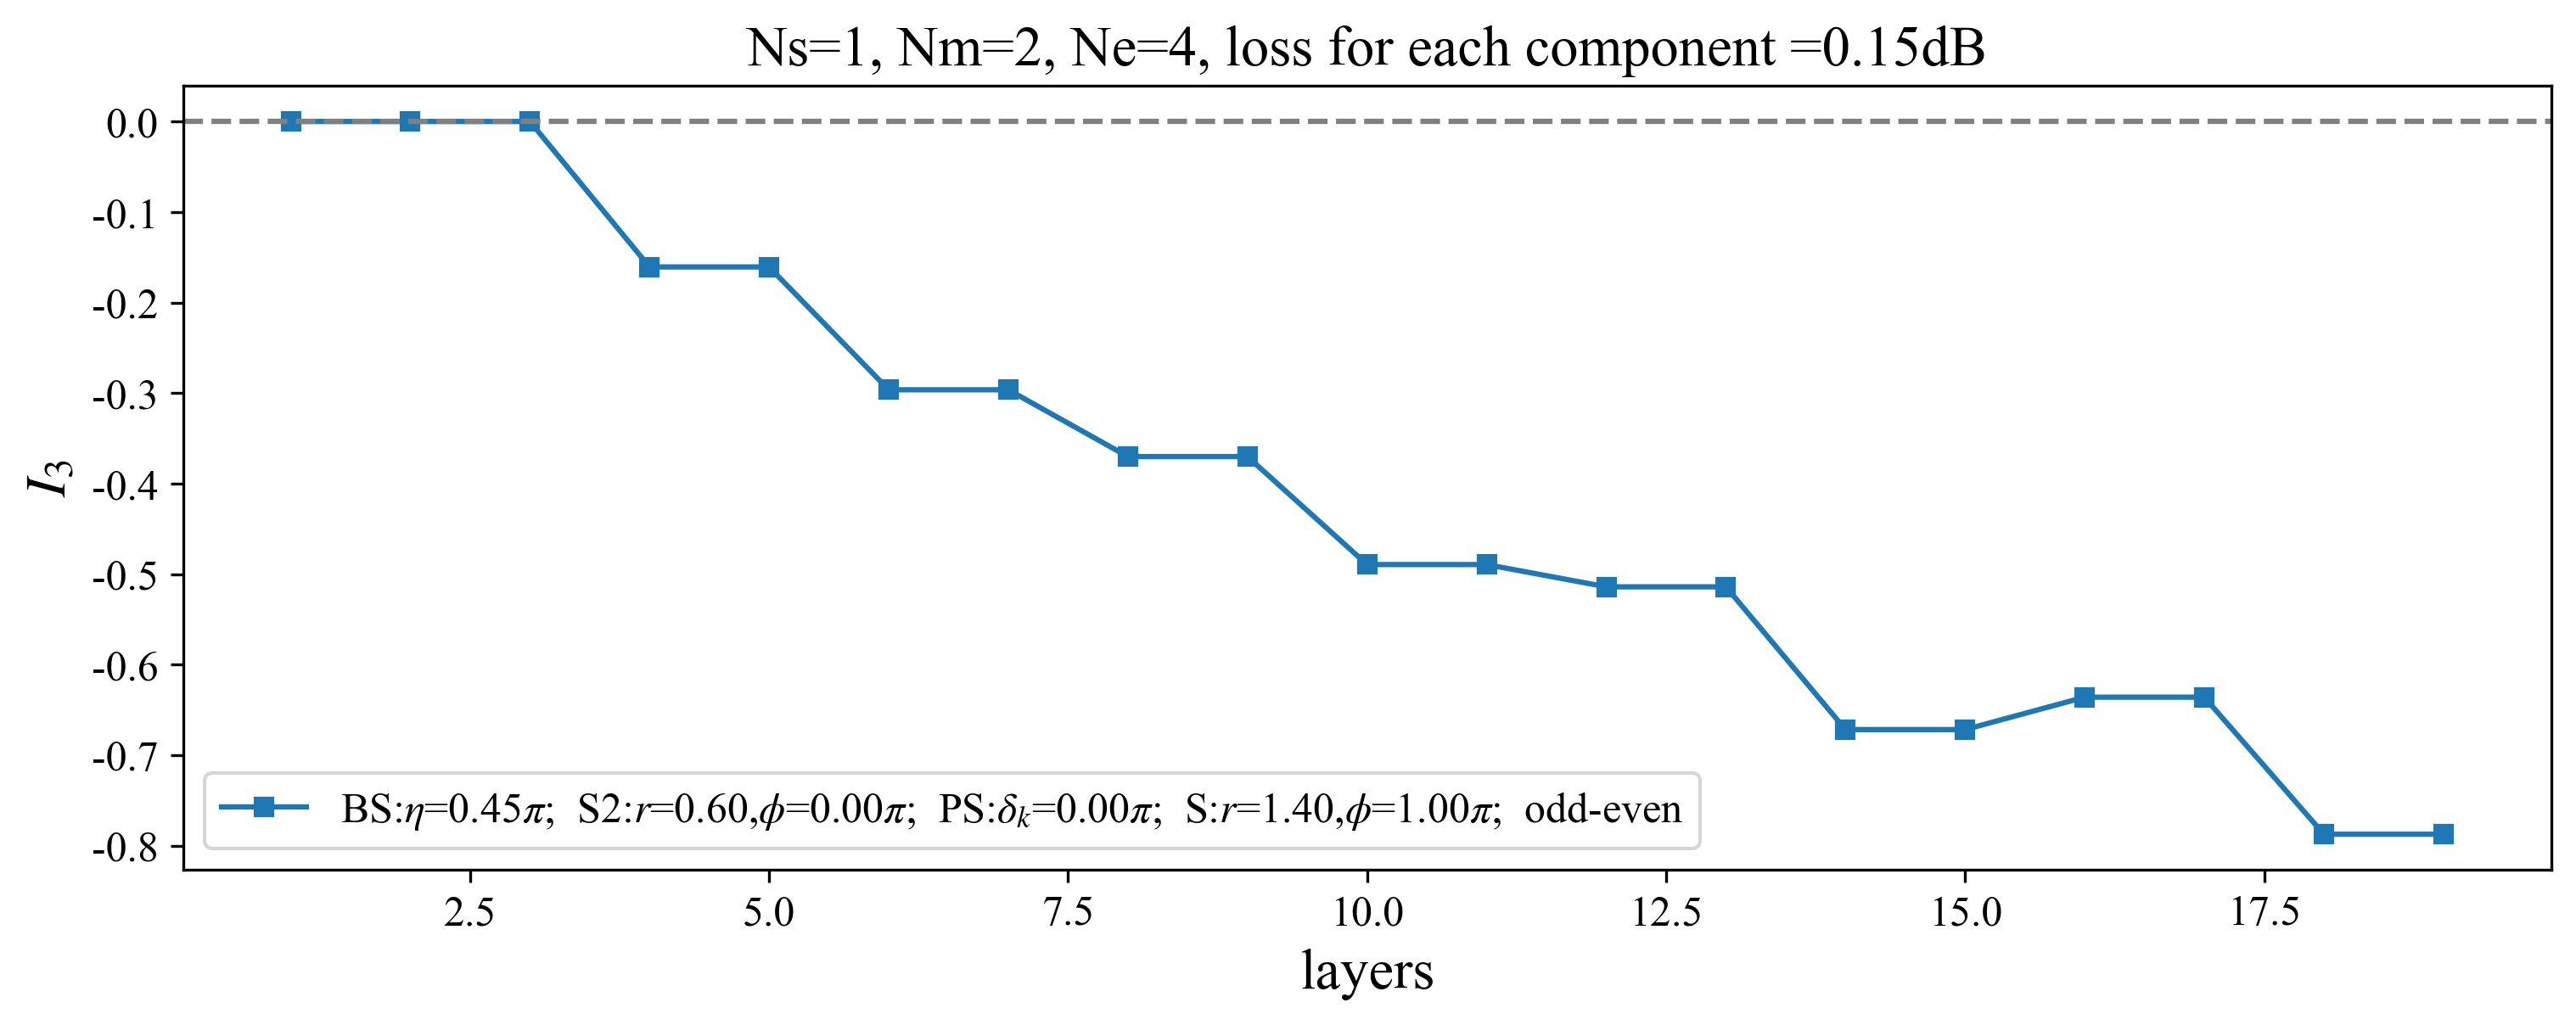

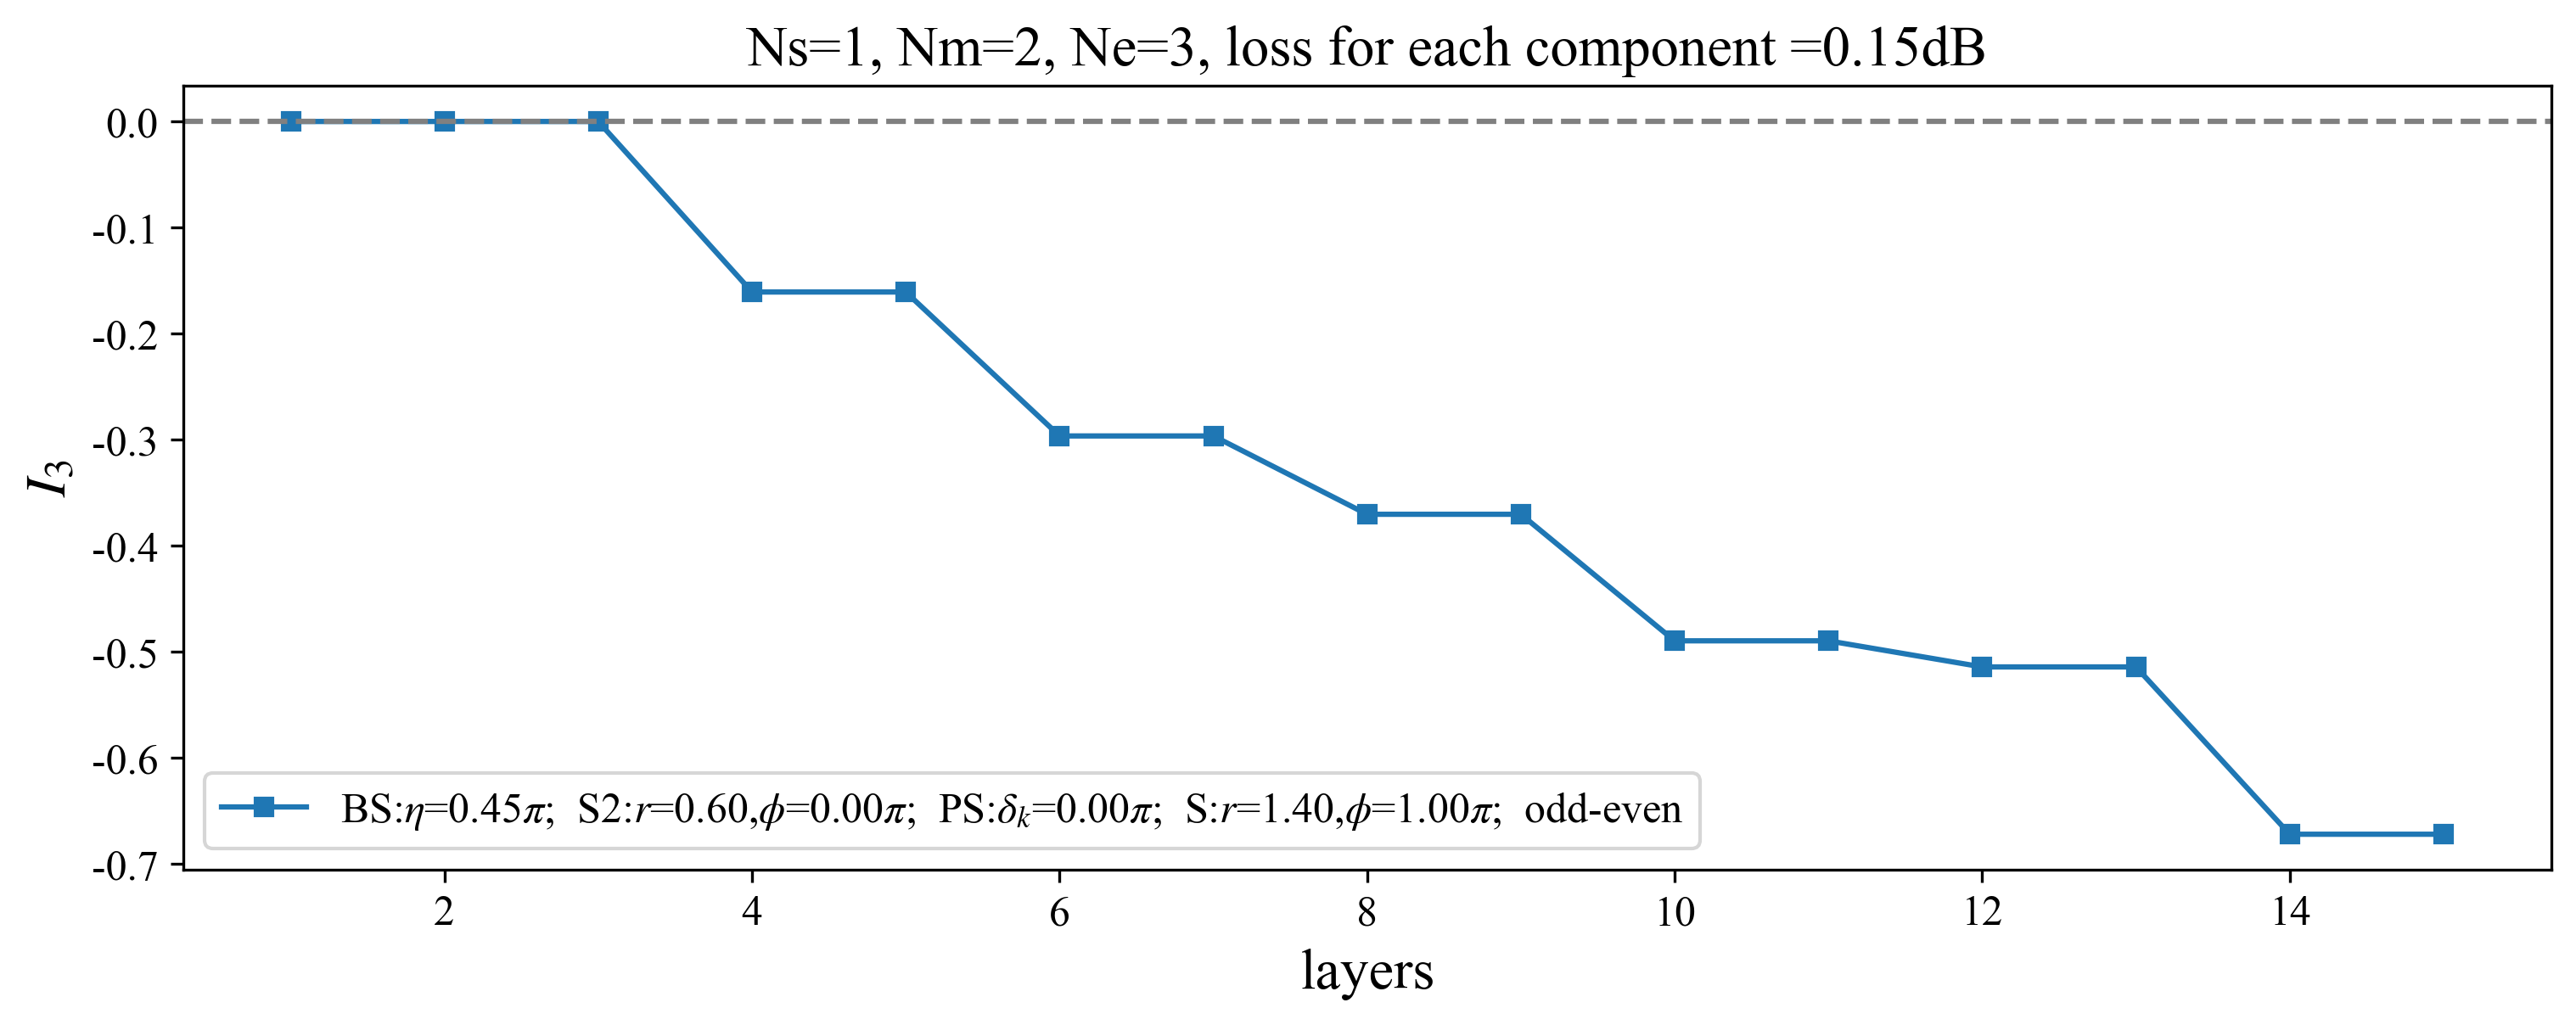

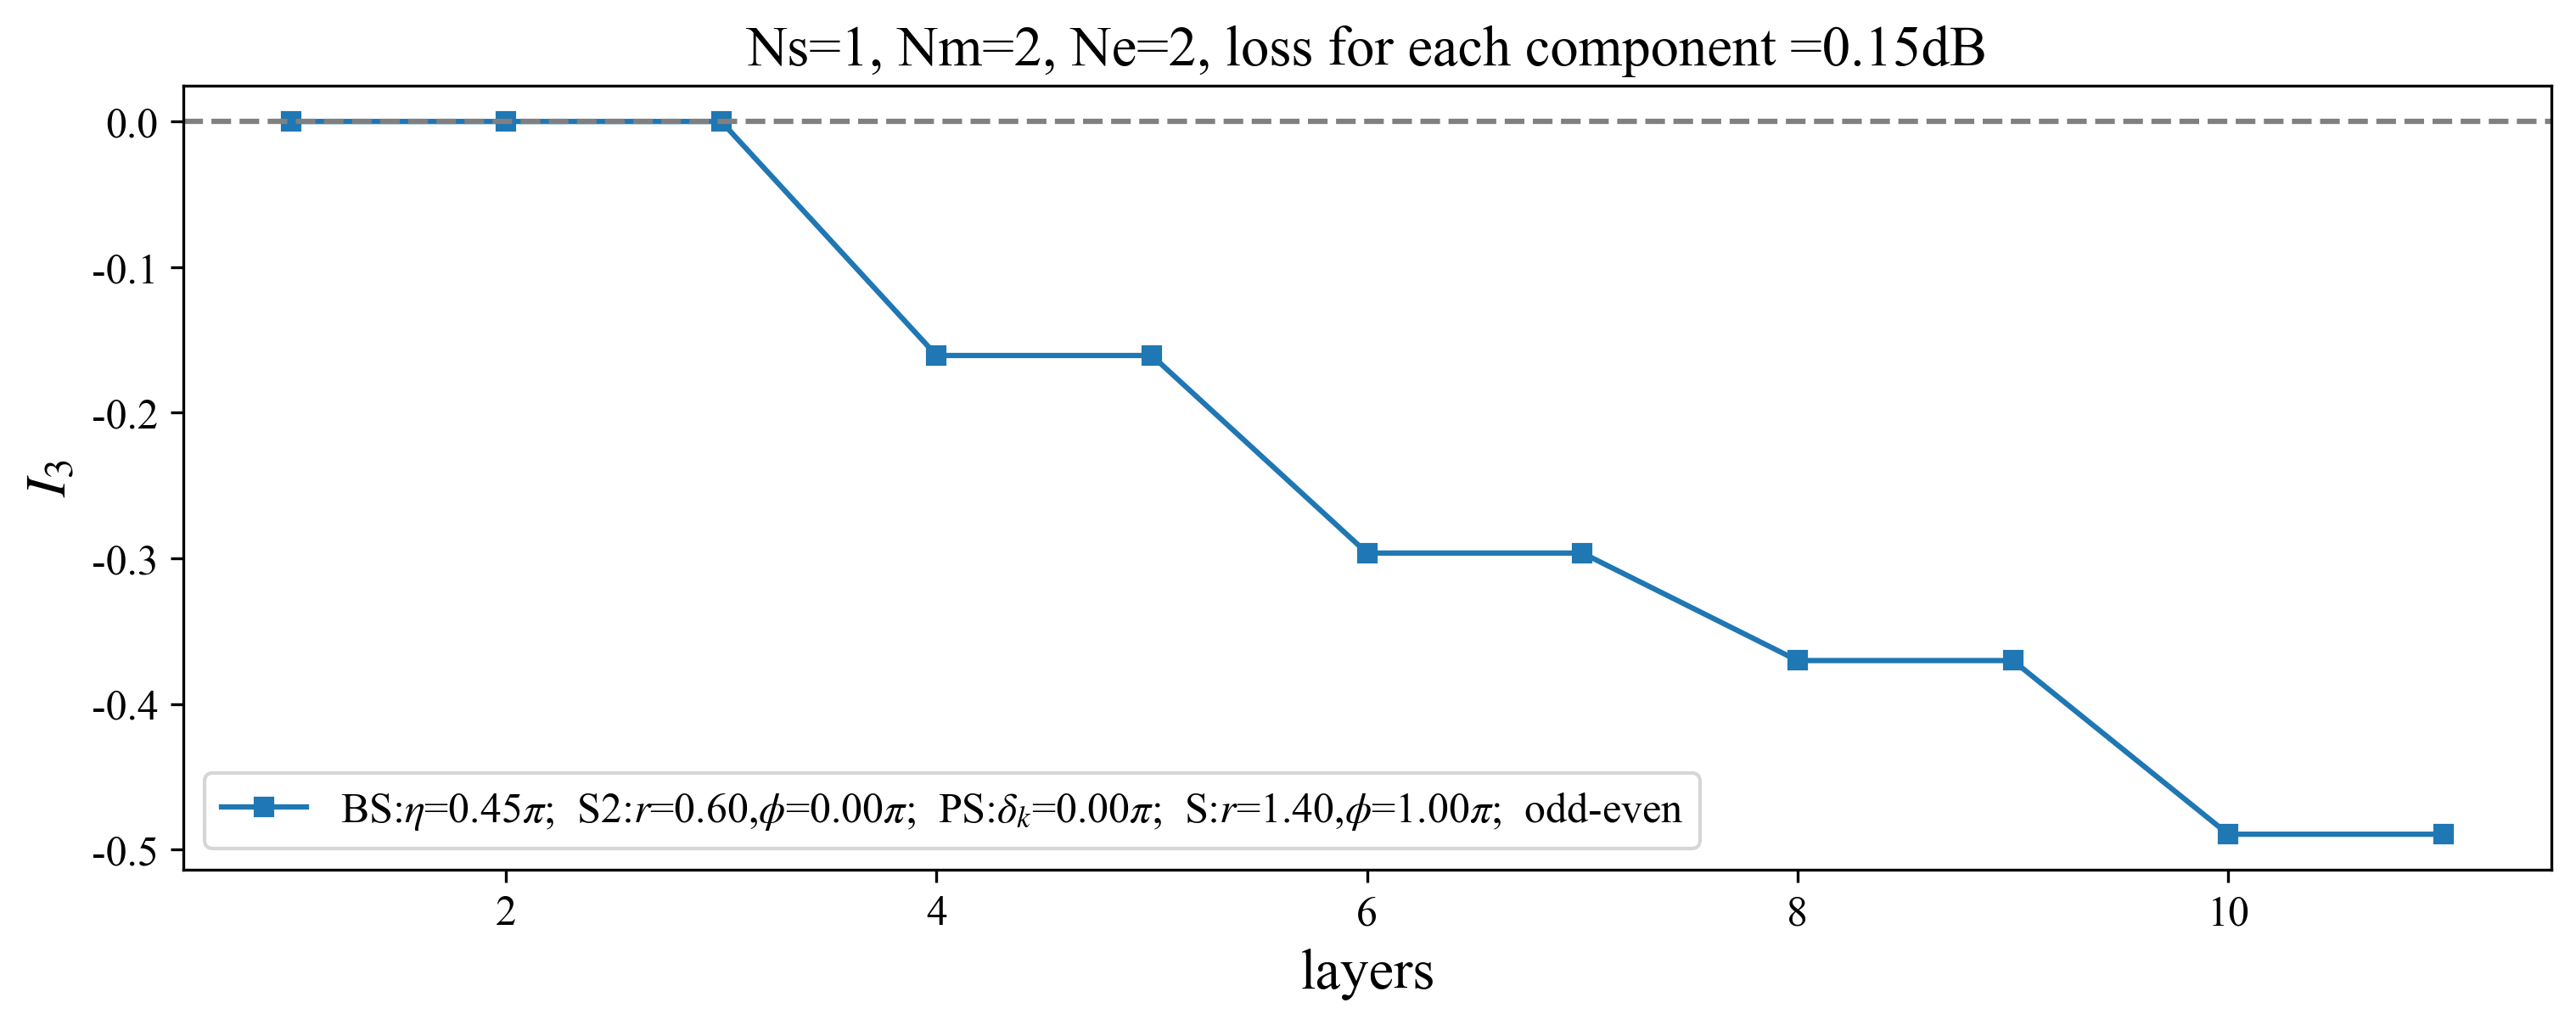

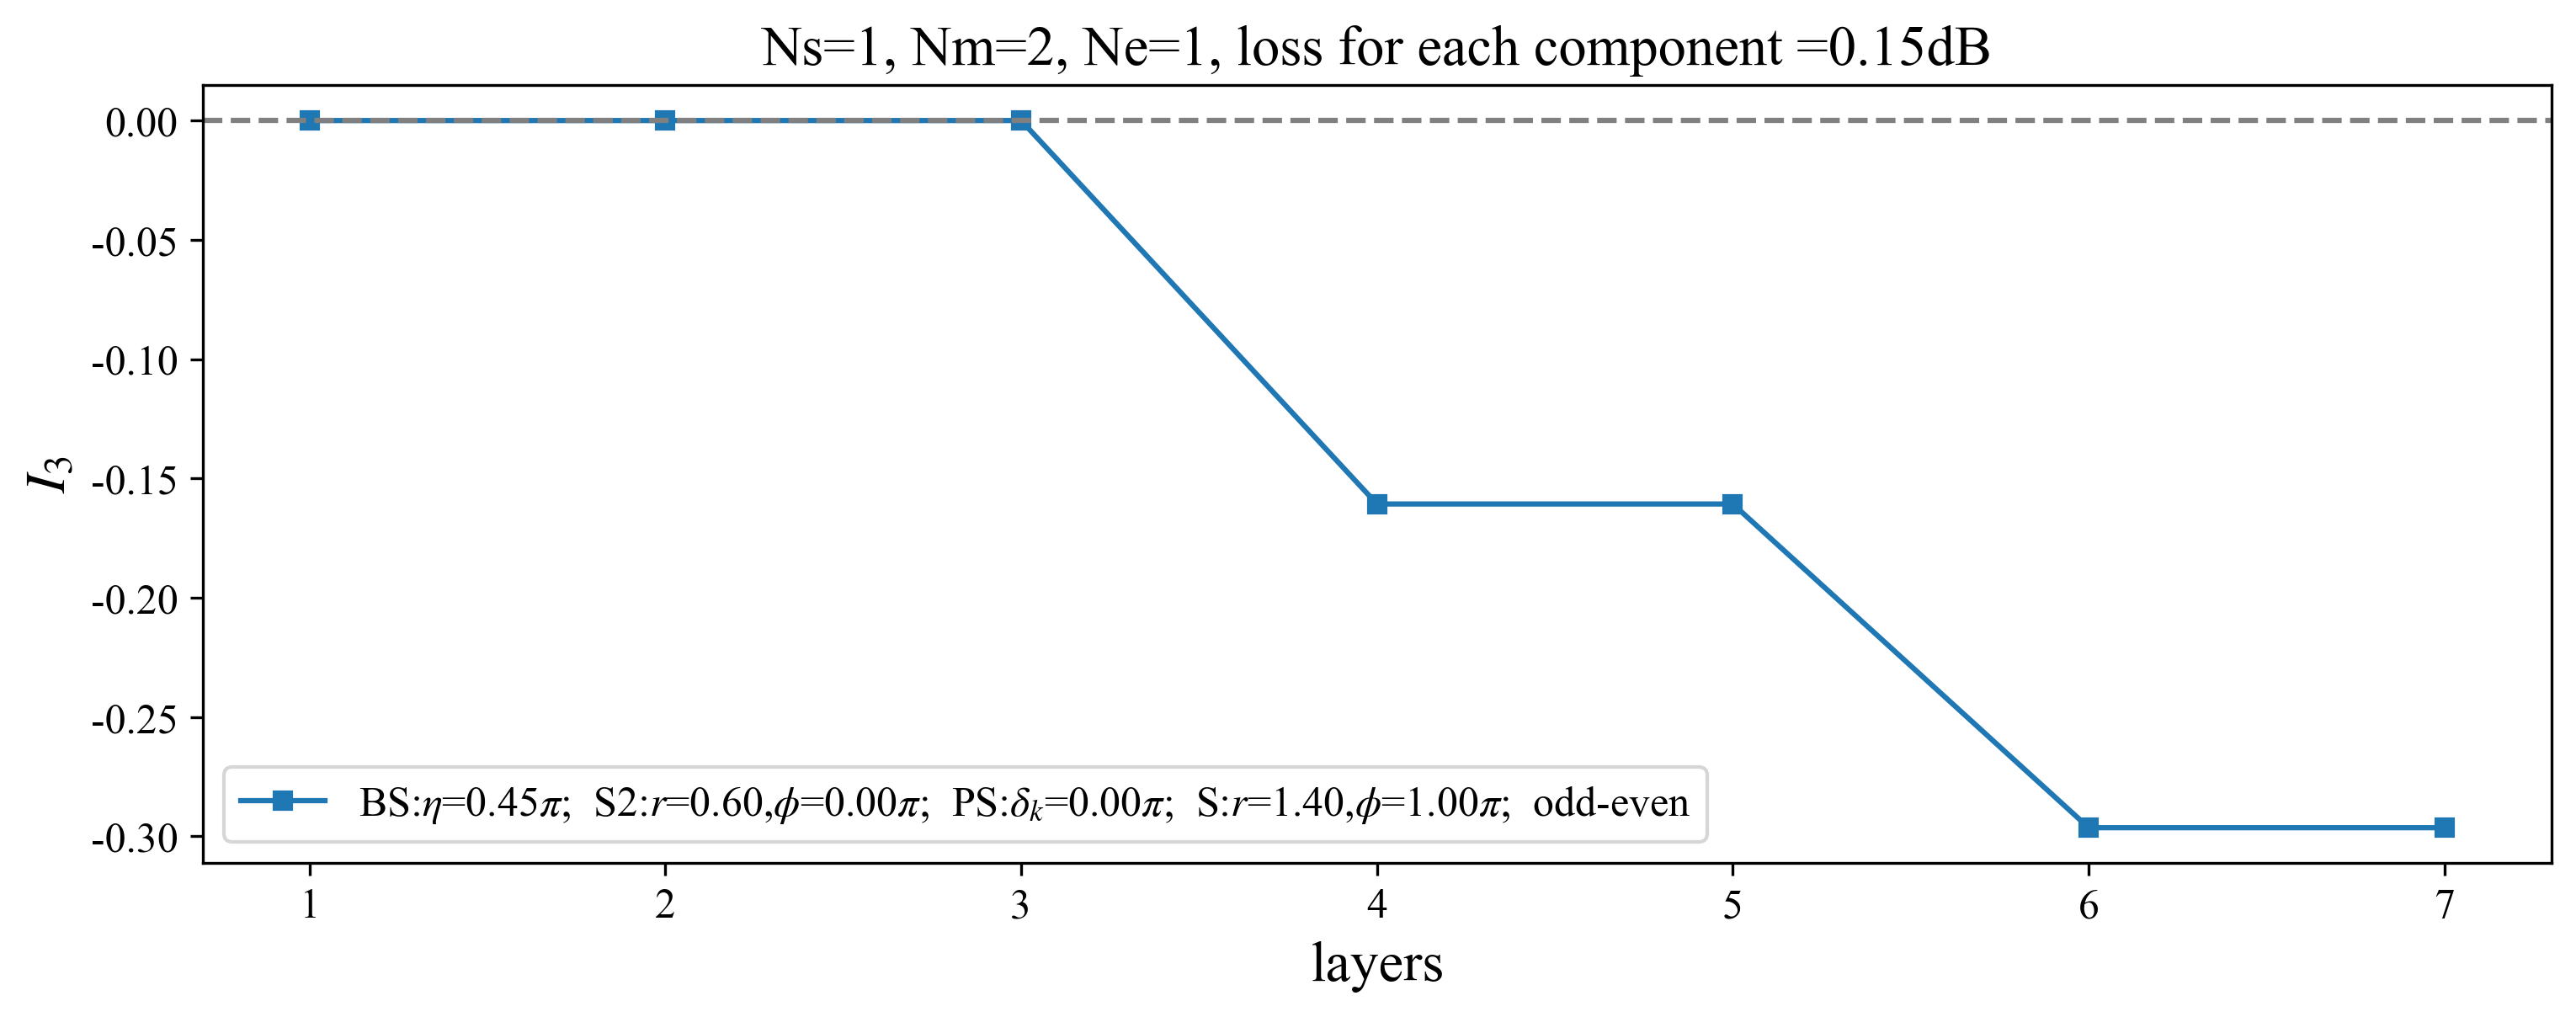

In [27]:
for NL in [5,4,3,2,1]:
    # scale
    Ns: int = 1
    Nm: int = 2
    # NL: int = 5
    n_modes = Ns + Nm + NL
    layers = 4*(Nm+NL) - 5

    # BS
    eta: float = np.pi * 0.45
    eta_list = [eta]

    # S2
    s_r: float = 0.6
    s_phi: float = 0
    s_r_list = [s_r]

    # PS 
    delta_k: float = 0

    # S
    r_k: float = 1.4
    phi_k: float = np.pi   # 取非零的那个
    r_k_list = [r_k]

    # loss
    if_add_loss: bool = False
    if_loss_input : bool = False
    loss_amplitude_bs : float = 2
    loss_input : np.array = None


    # load array from excel
    import pandas as pd
    df = pd.read_excel('loss_8_mode.xlsx')
    loss_input = df.values


    # additonal features
    if_odd_even: bool = True
    if_part_computing: bool = True
    part_computing_layers: int = np.arange(4*(Nm+NL) - 5) + 1

    if_uncertain_params: bool = False
    uncertain_percentage: float = 0.05


    I3 = np.zeros(len(part_computing_layers))


    plt.figure(figsize=(12, 4), dpi=300)
    ################################
    if_add_loss: bool = False
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=False,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i]      # additonal features
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'         
    if if_add_loss:
        tittle += r';  loss={:.2f}dB'.format(loss_amplitude)


    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)



    ################################

    # # 加水平横线
    plt.axhline(y=0, color='gray', linestyle='--')
    # plt.axvline(x=5, color='gray', linestyle='--')

    plt.xlabel(r'layers', fontsize=16)
    plt.ylabel(r'$I_3$', fontsize=16)
    plt.legend()
    plt.title(r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15), fontsize=16)
    savename =  r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15) +\
                r"BS--eta={:.2f}pi-S2--r={:.2f}-phi={:.2f}pi-".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS--delta_k={:.2f}pi-S--r={:.2f}-phi={:.2f}pi".format(delta_k/np.pi, r_k, phi_k/np.pi) + \
                r'-bs_loss={:.1f}'.format(loss_amplitude_bs)   
    plt.savefig(r'pic3/'+savename+r'.png', 
                dpi=300, bbox_inches='tight')
    plt.show()



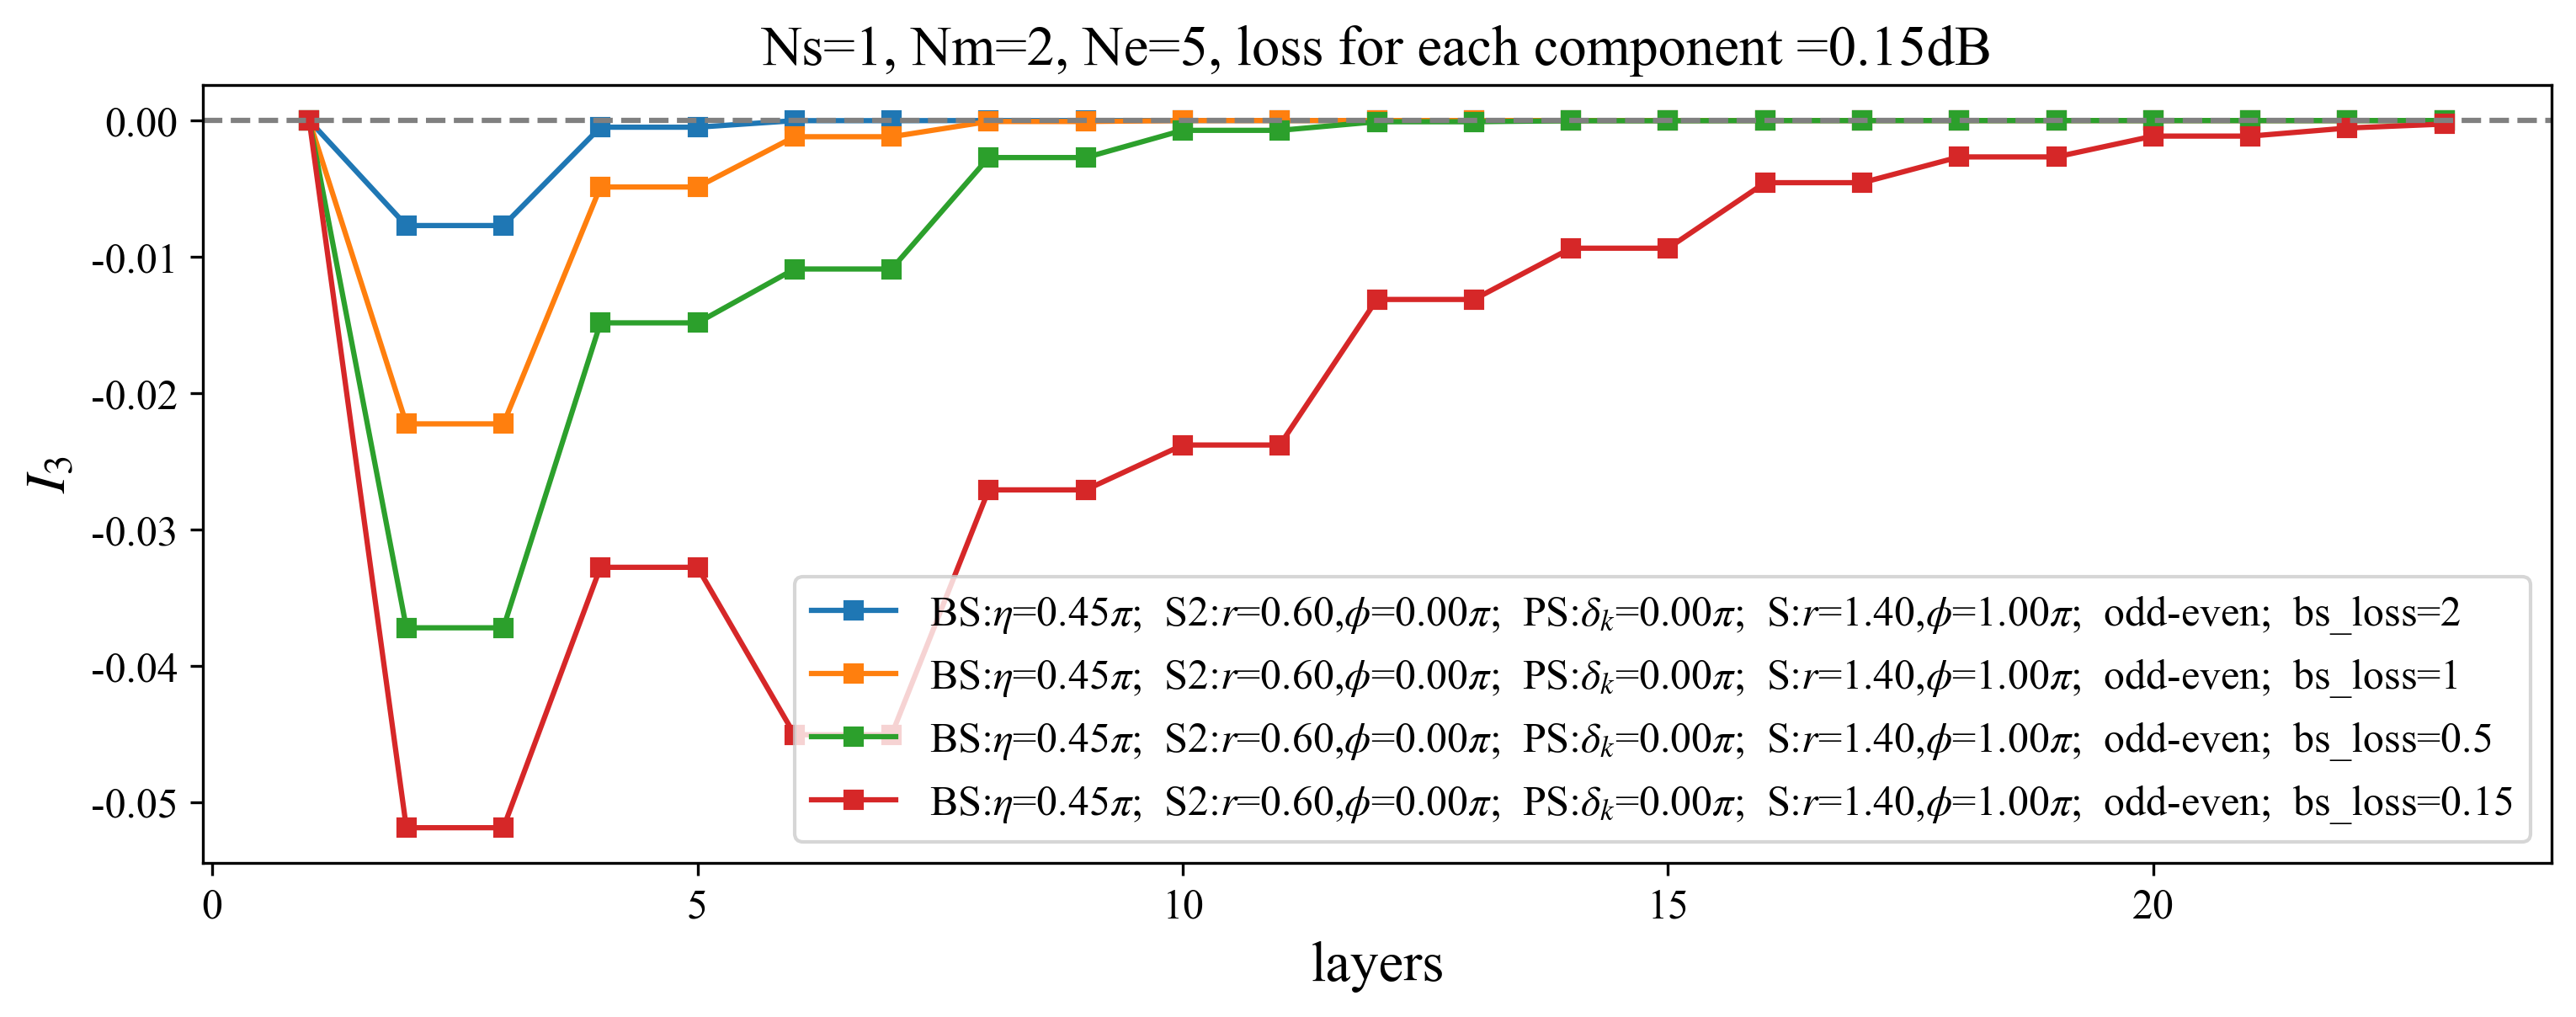

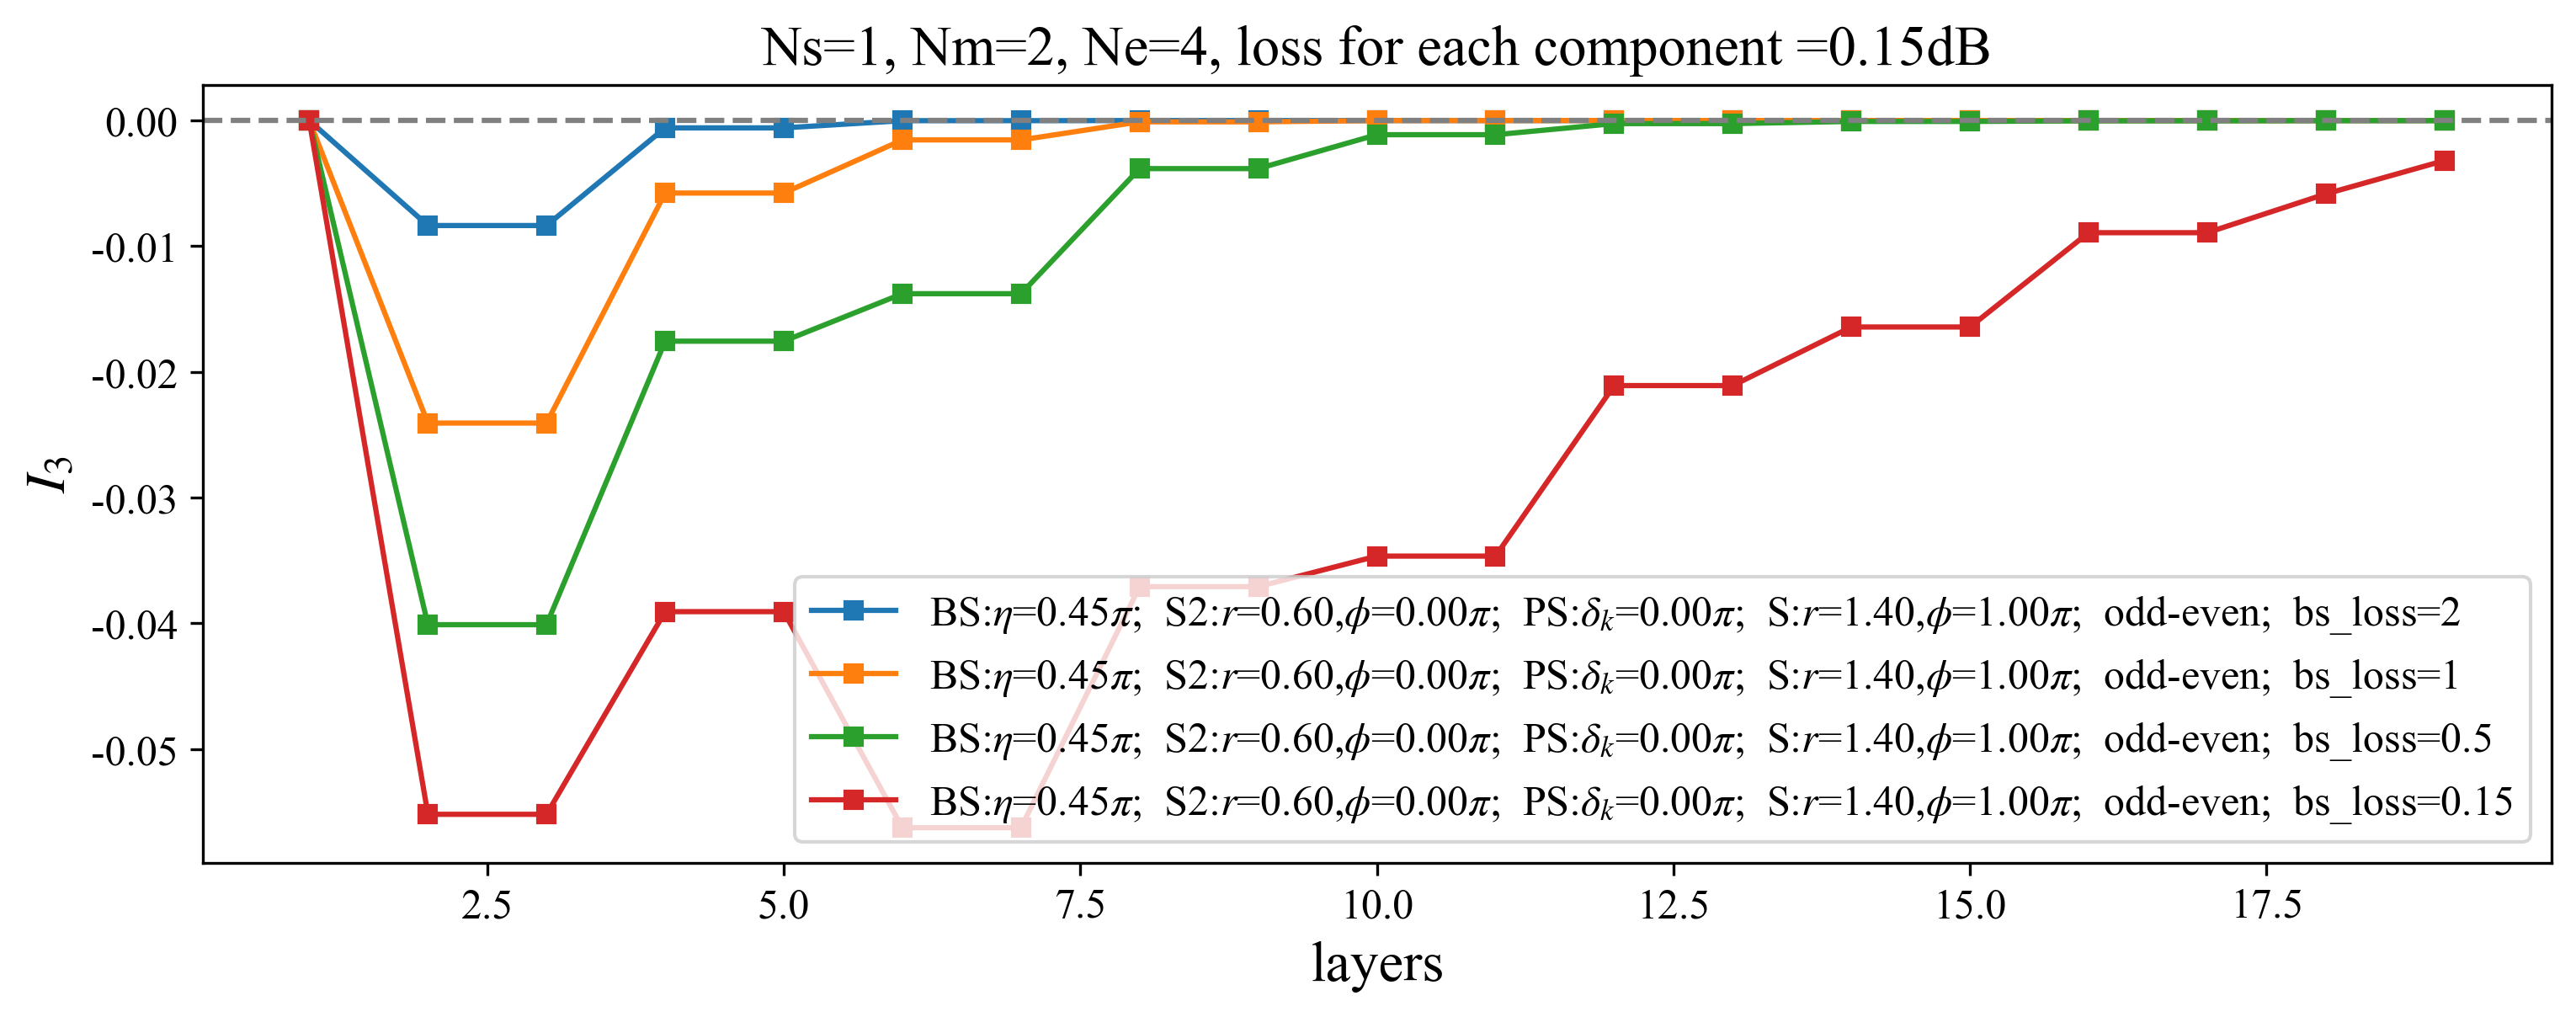

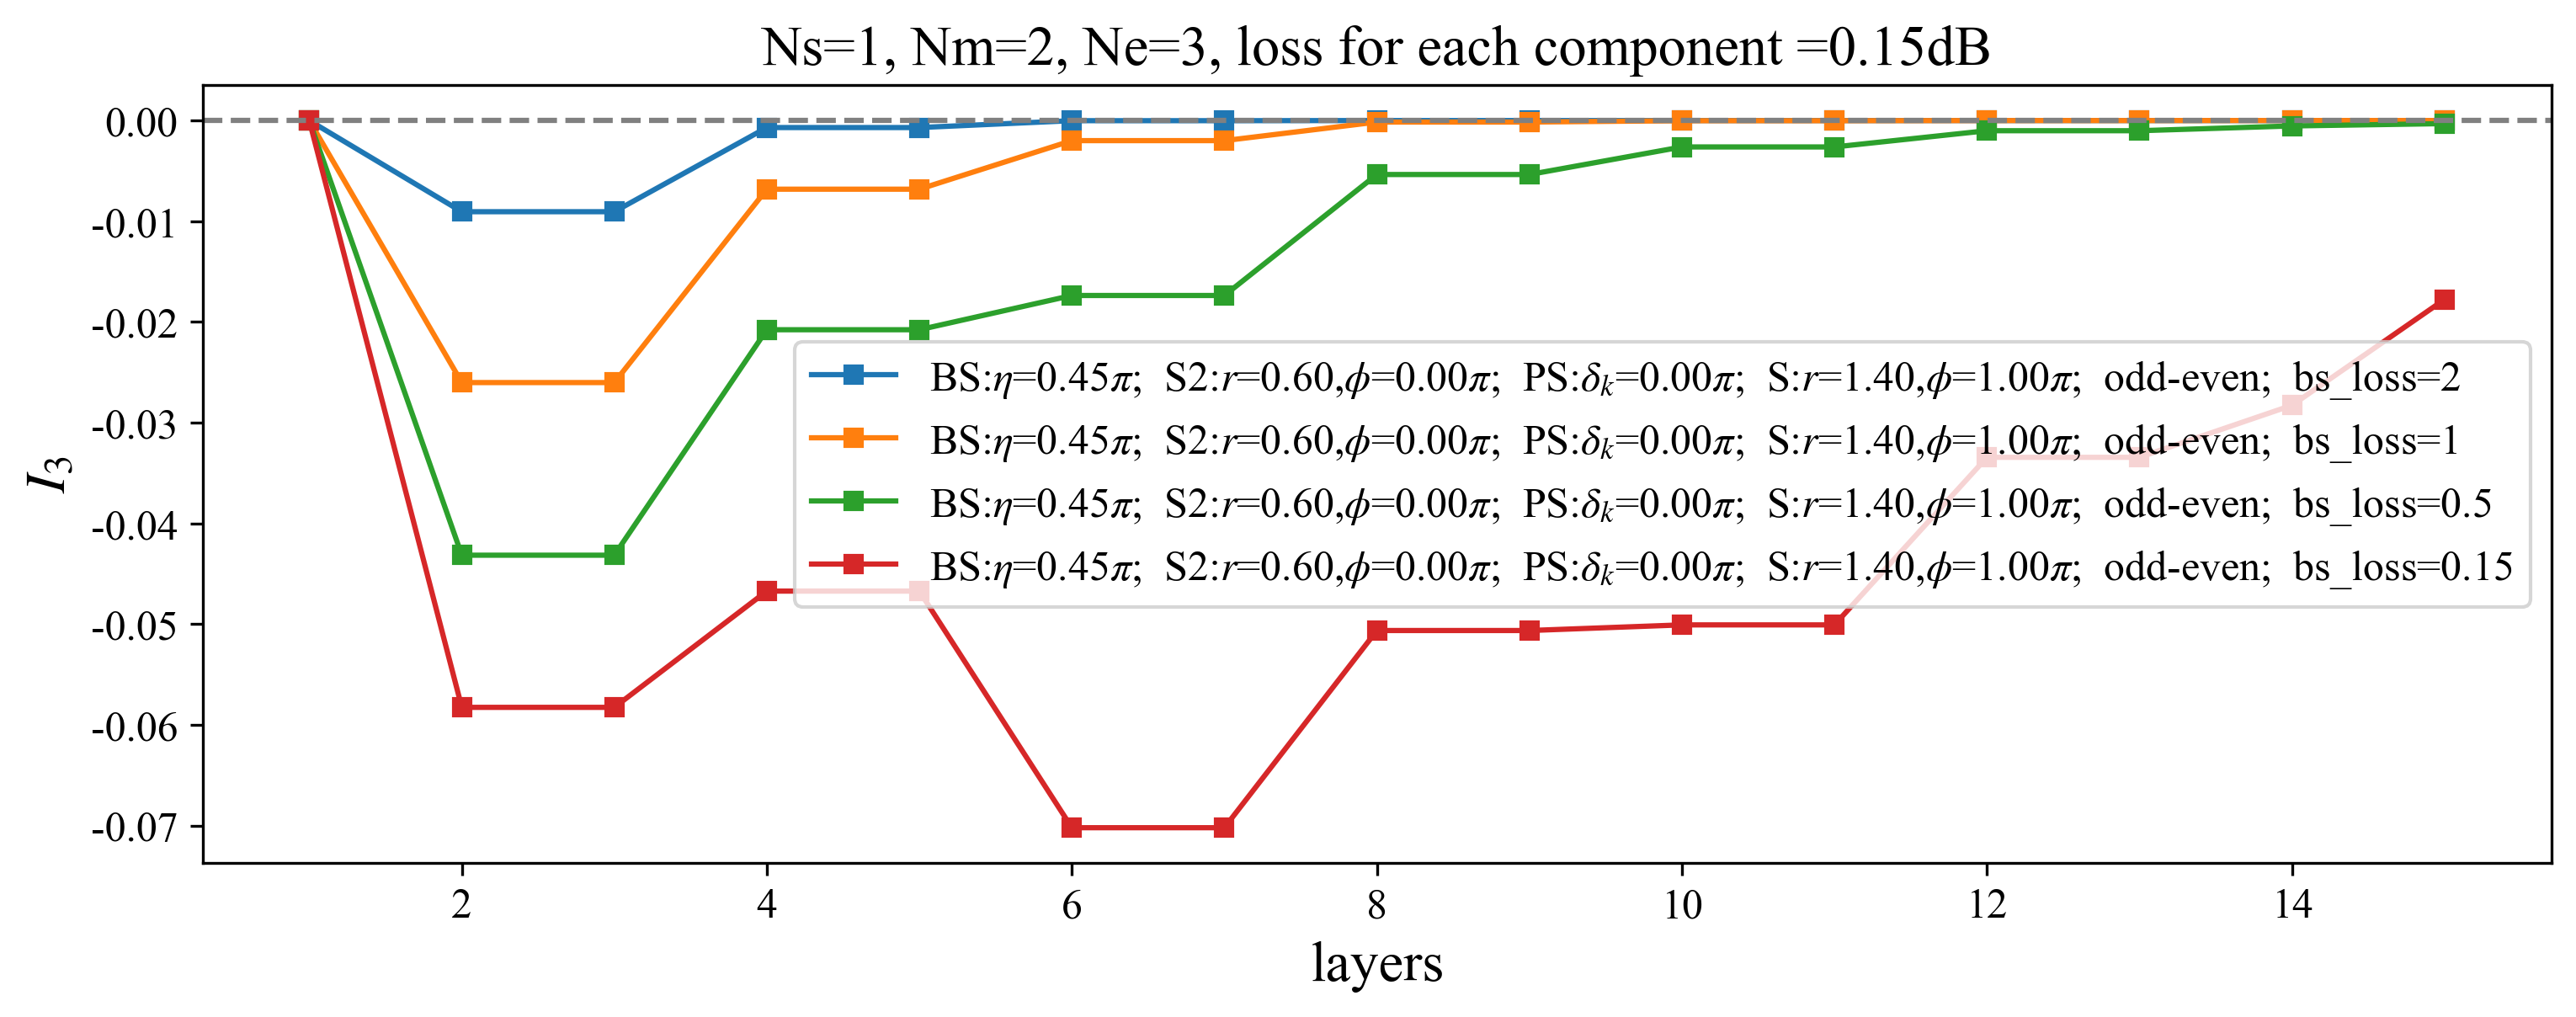

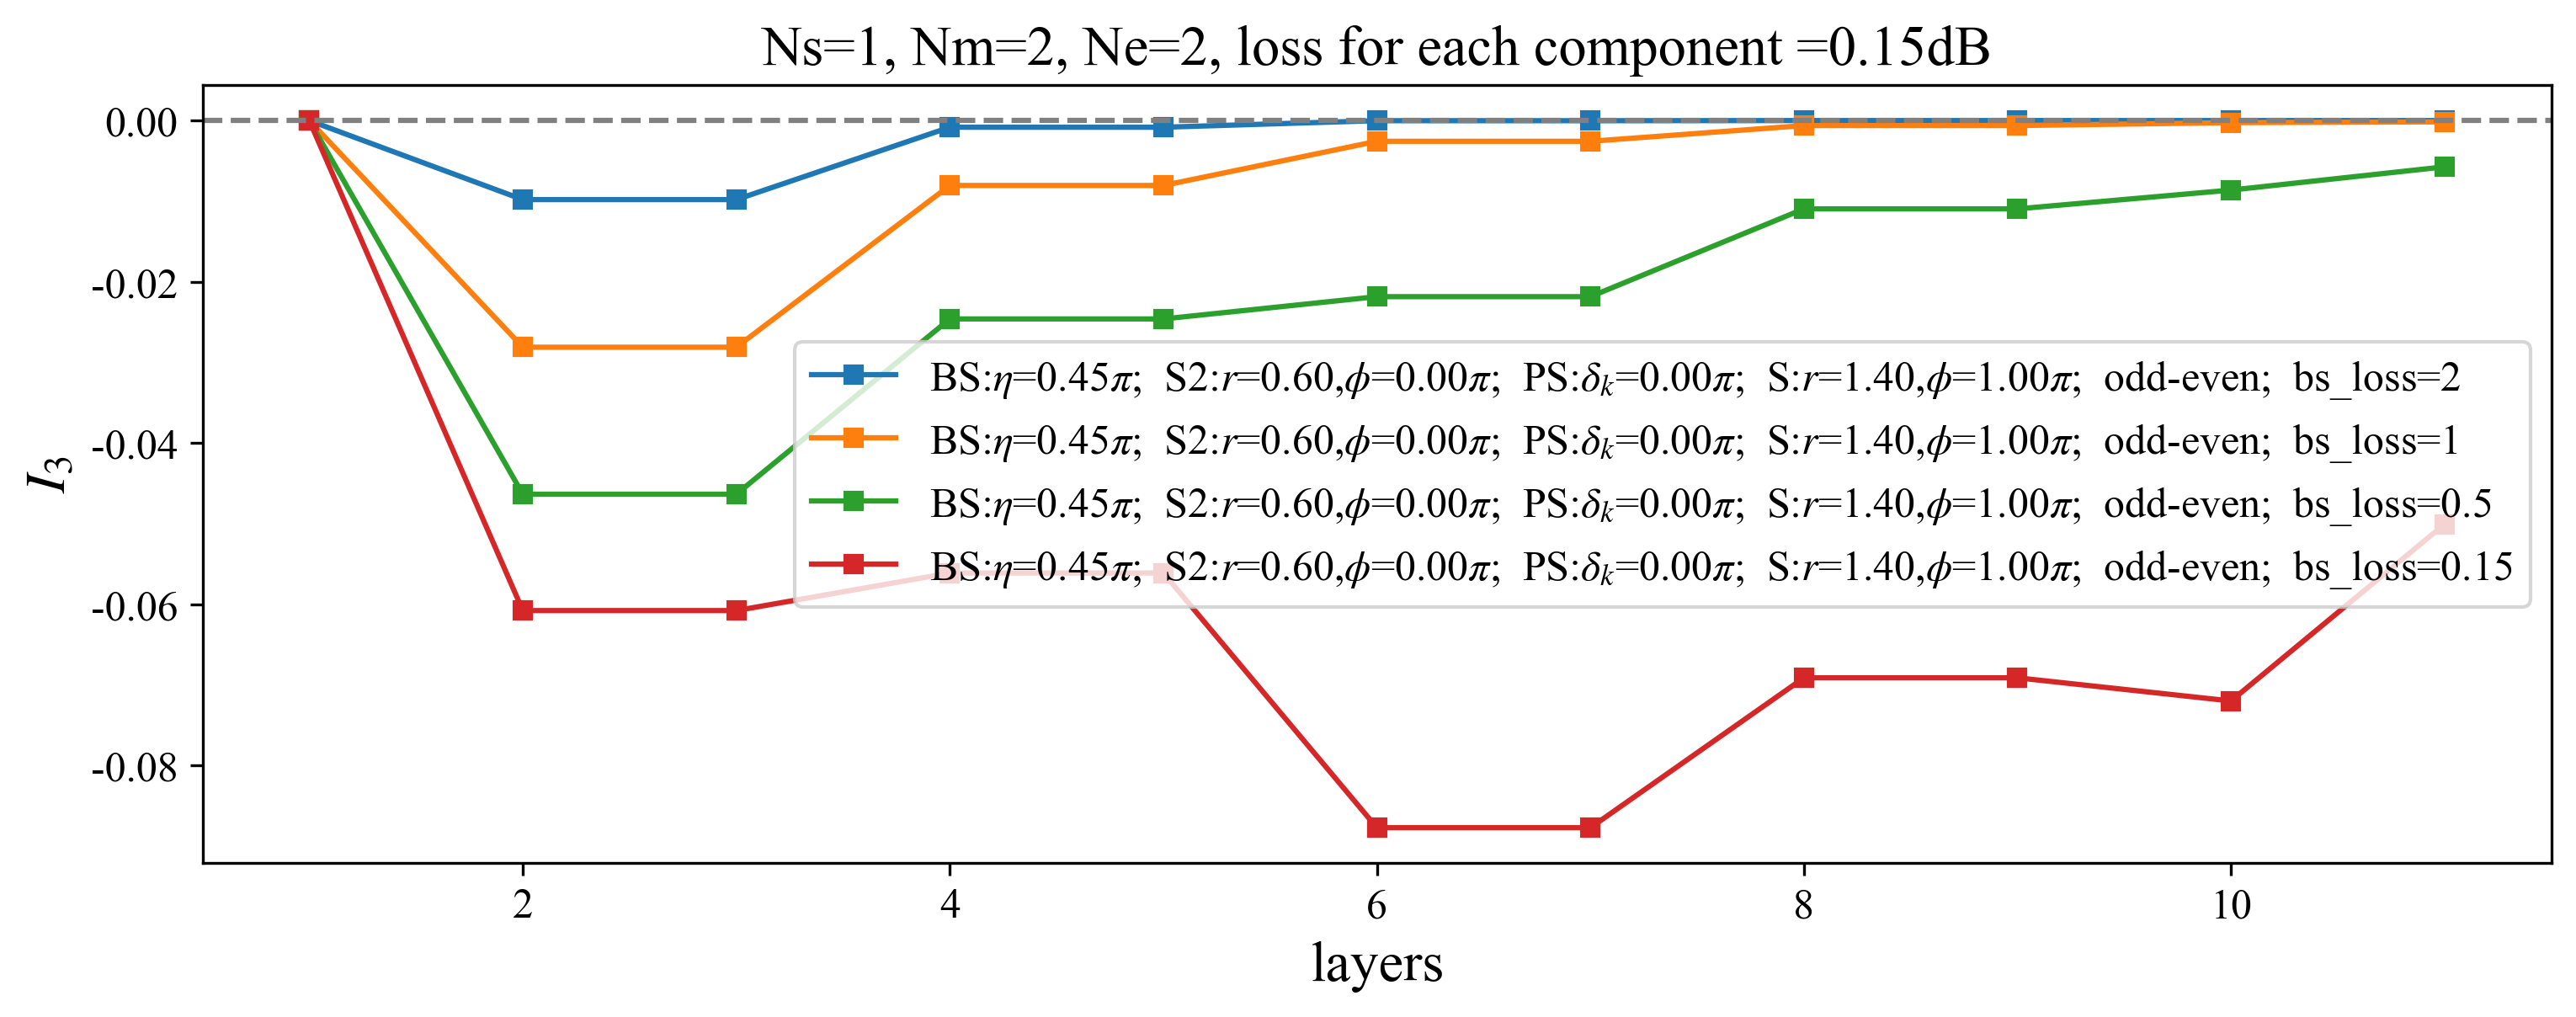

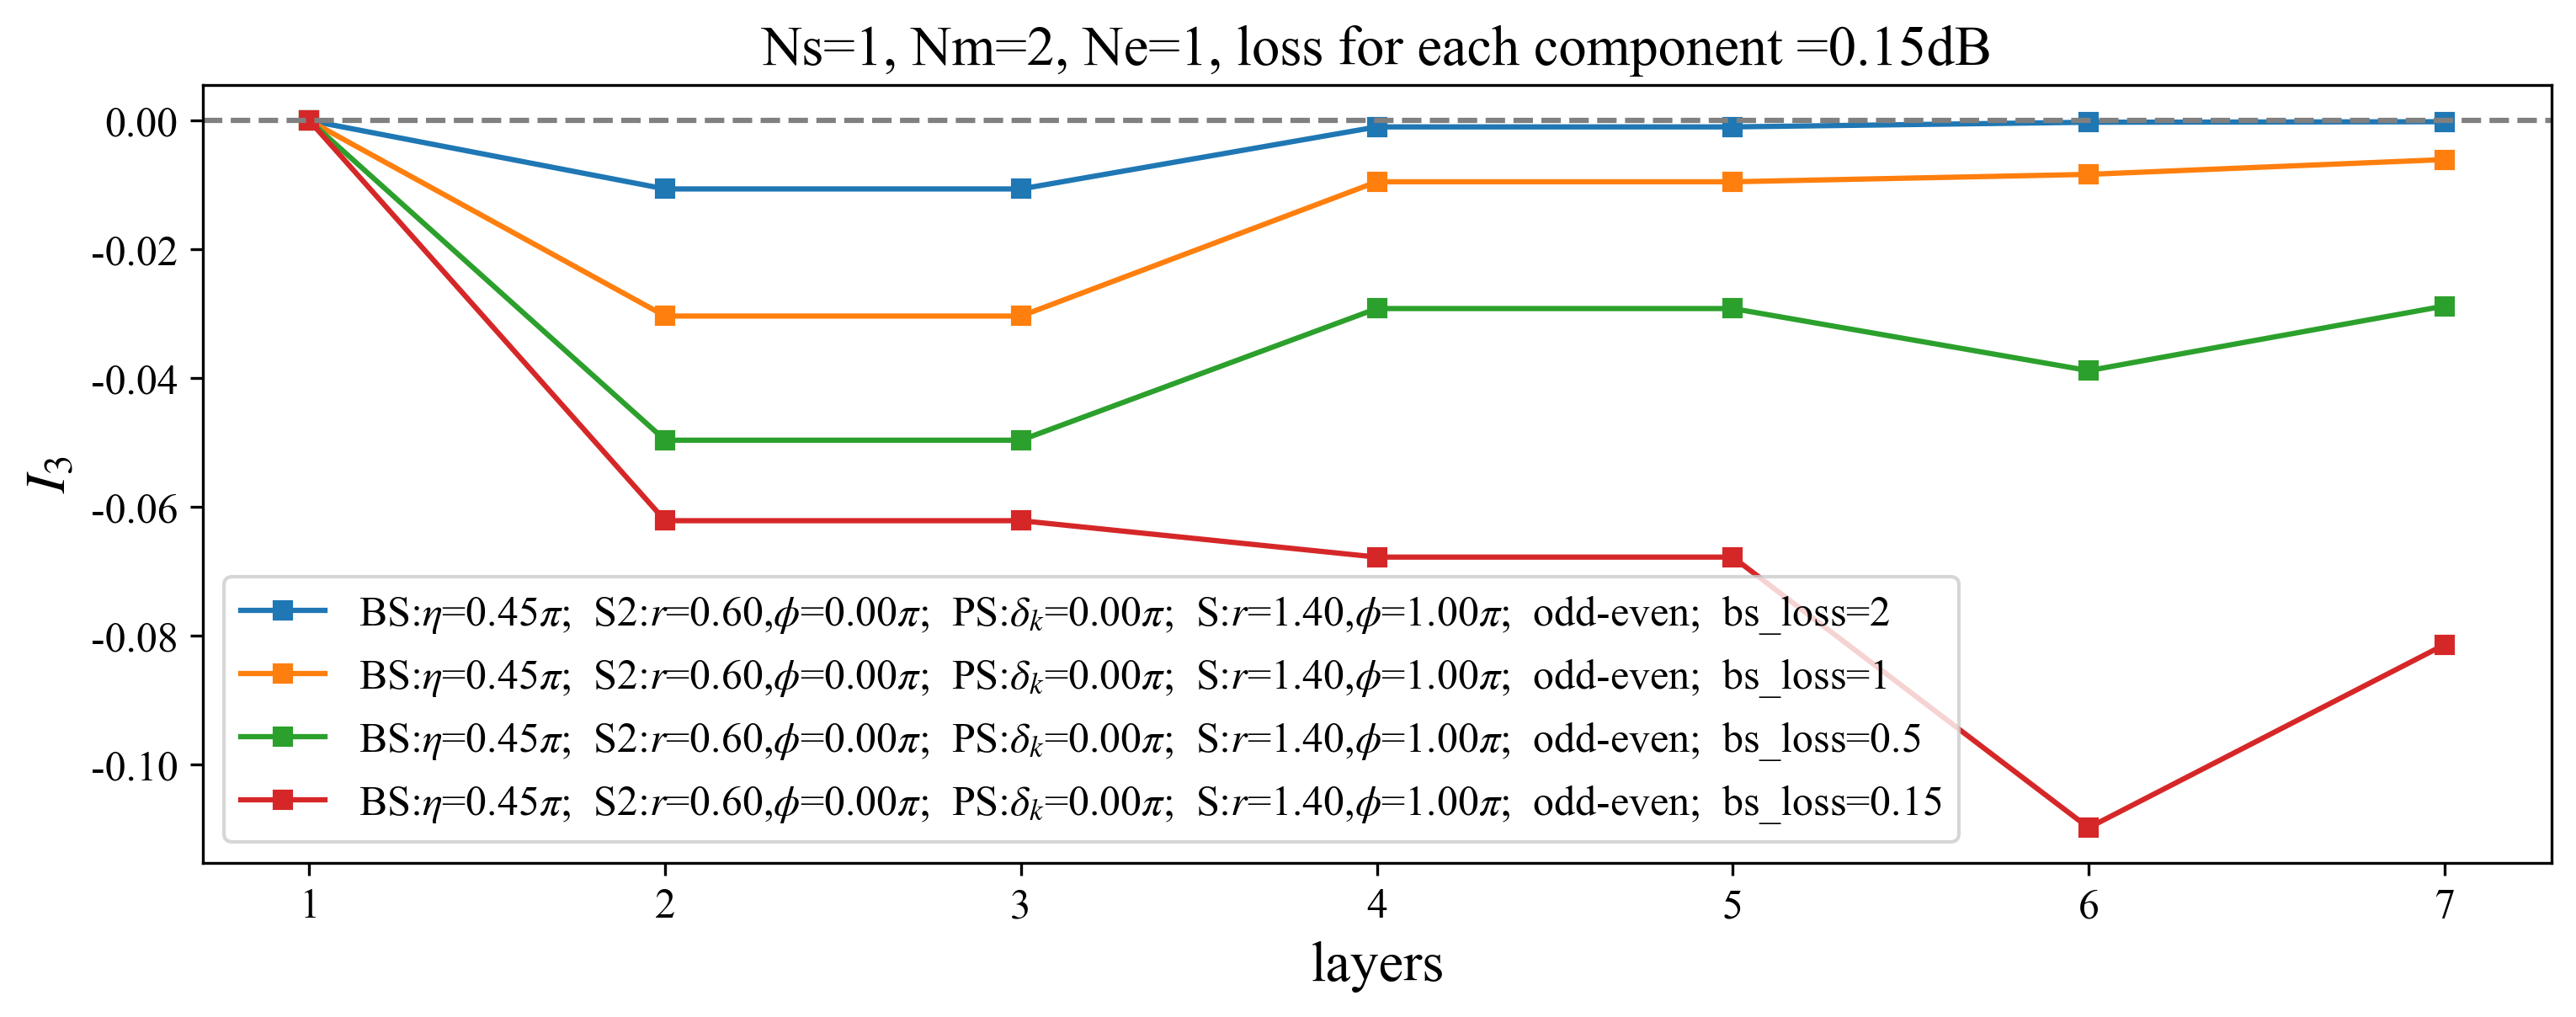

In [28]:
for NL in [5,4,3,2,1]:
    # scale
    Ns: int = 1
    Nm: int = 2
    # NL: int = 5
    n_modes = Ns + Nm + NL
    layers = 4*(Nm+NL) - 5

    # BS
    eta: float = np.pi * 0.45
    eta_list = [eta]

    # S2
    s_r: float = 0.6
    s_phi: float = 0
    s_r_list = [s_r]

    # PS 
    delta_k: float = 0

    # S
    r_k: float = 1.4
    phi_k: float = np.pi   # 取非零的那个
    r_k_list = [r_k]

    # loss
    if_add_loss: bool = False
    if_loss_input : bool = False
    loss_amplitude_bs : float = 2
    loss_input : np.array = None


    # load array from excel
    import pandas as pd
    df = pd.read_excel('loss_8_mode.xlsx')
    loss_input = df.values


    # additonal features
    if_odd_even: bool = True
    if_part_computing: bool = True
    part_computing_layers: int = np.arange(4*(Nm+NL) - 5) + 1

    if_uncertain_params: bool = False
    uncertain_percentage: float = 0.05


    I3 = np.zeros(len(part_computing_layers))


    plt.figure(figsize=(12, 4), dpi=300)
    ################################


    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 2
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i]      # additonal features
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'        
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 1
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i]      # additonal features
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'        
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 0.5
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i]      # additonal features
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'      
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 0.15
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i]      # additonal features
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'     
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()


  

    ################################

    # # 加水平横线
    plt.axhline(y=0, color='gray', linestyle='--')
    # plt.axvline(x=5, color='gray', linestyle='--')

    plt.xlabel(r'layers', fontsize=16)
    plt.ylabel(r'$I_3$', fontsize=16)
    plt.legend()
    plt.title(r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15), fontsize=16)
    savename =  r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15) +\
                r"BS--eta={:.2f}pi-S2--r={:.2f}-phi={:.2f}pi-".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS--delta_k={:.2f}pi-S--r={:.2f}-phi={:.2f}pi".format(delta_k/np.pi, r_k, phi_k/np.pi) + \
                r'-bs_loss={:.1f}-loss'.format(loss_amplitude_bs)   
    plt.savefig(r'pic3/'+savename+r'.png', 
                dpi=300, bbox_inches='tight')
    plt.show()



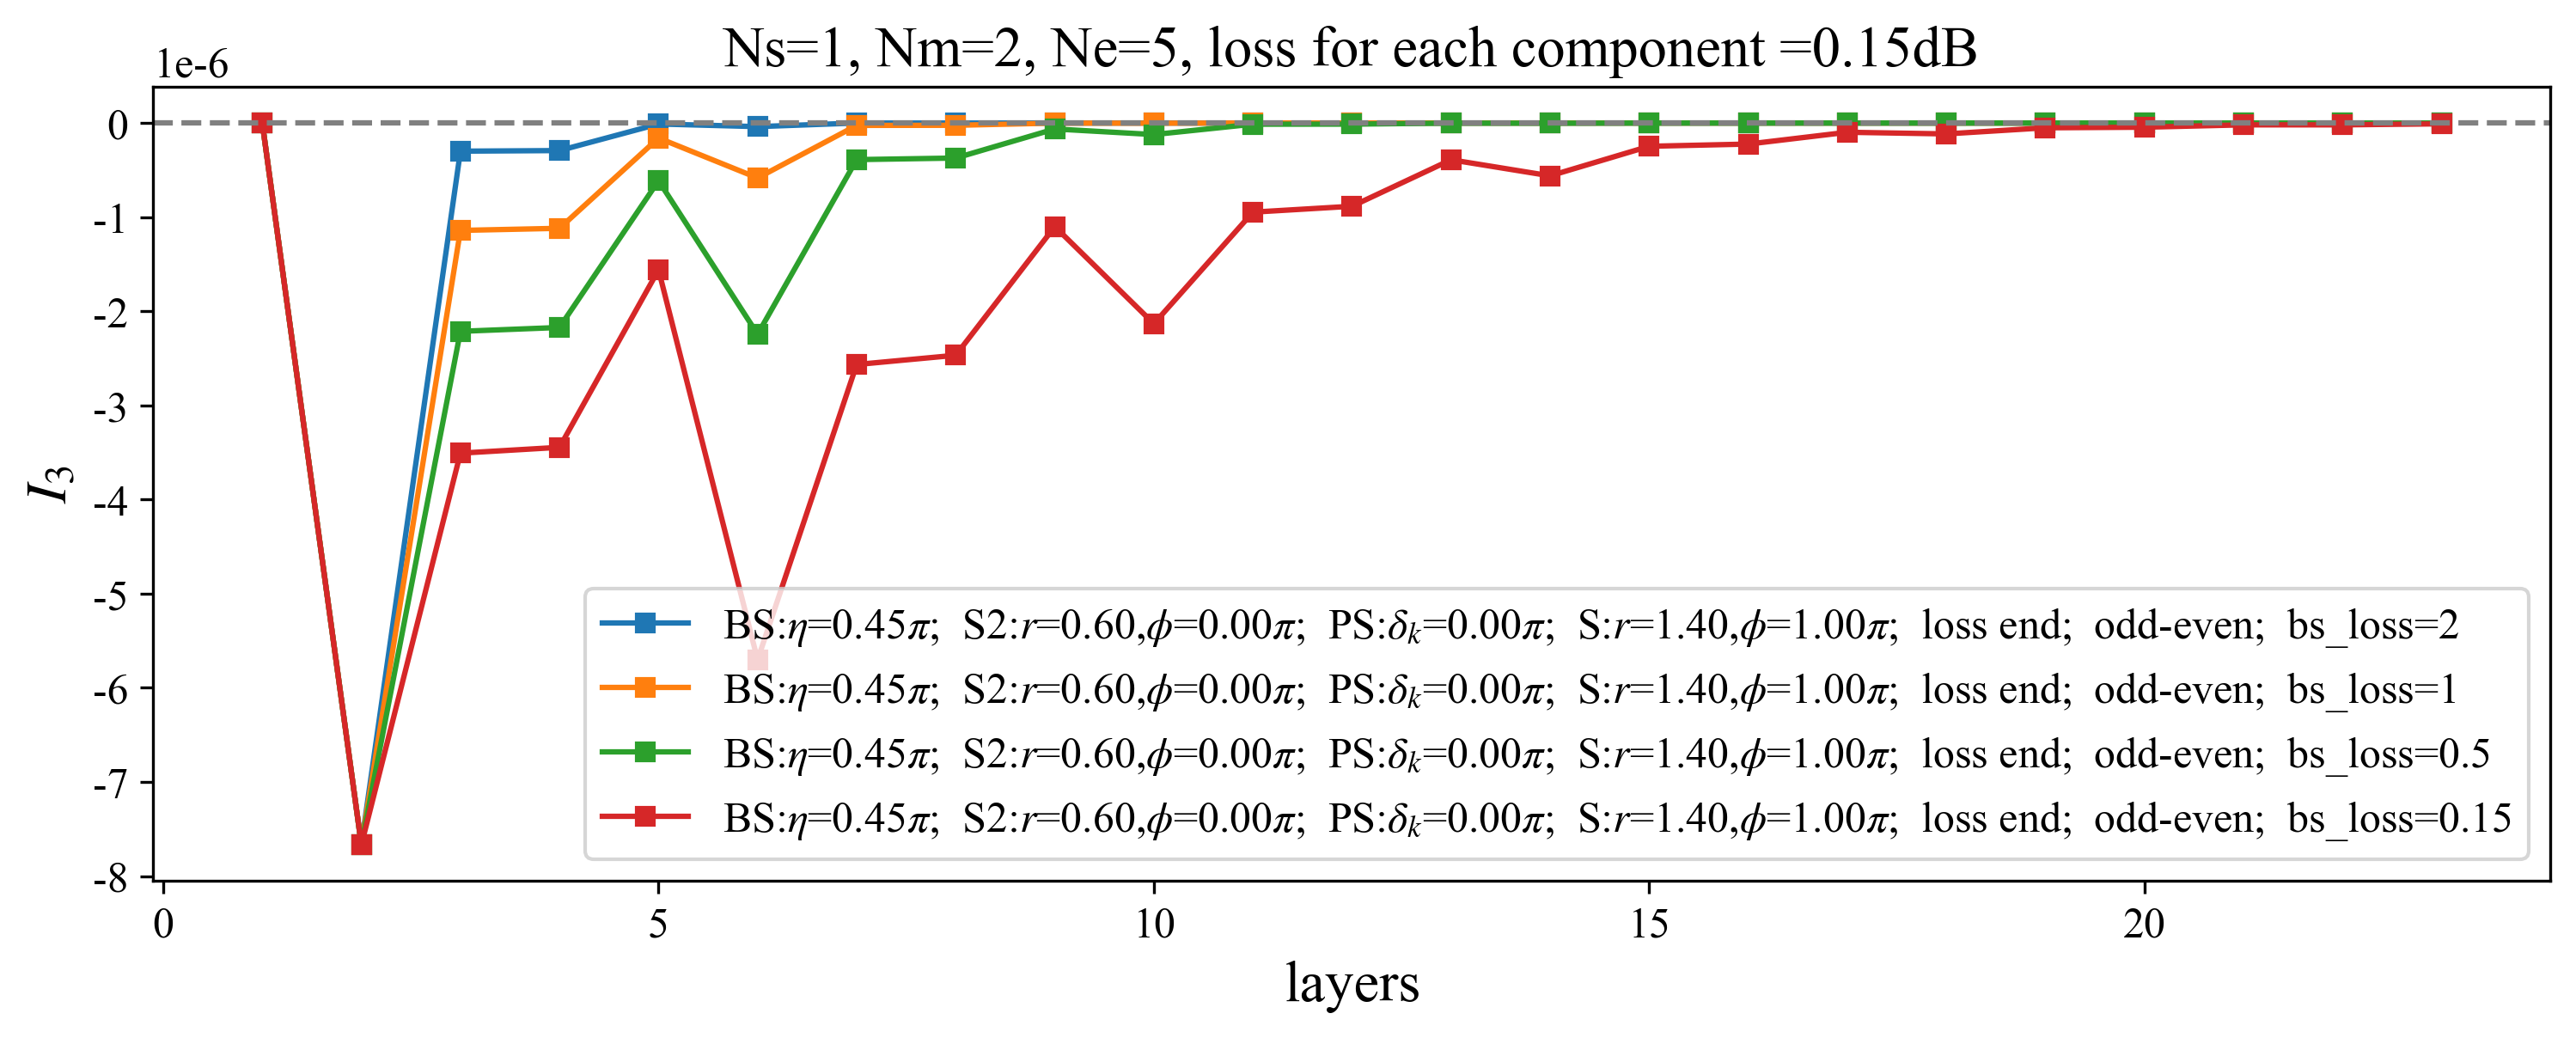

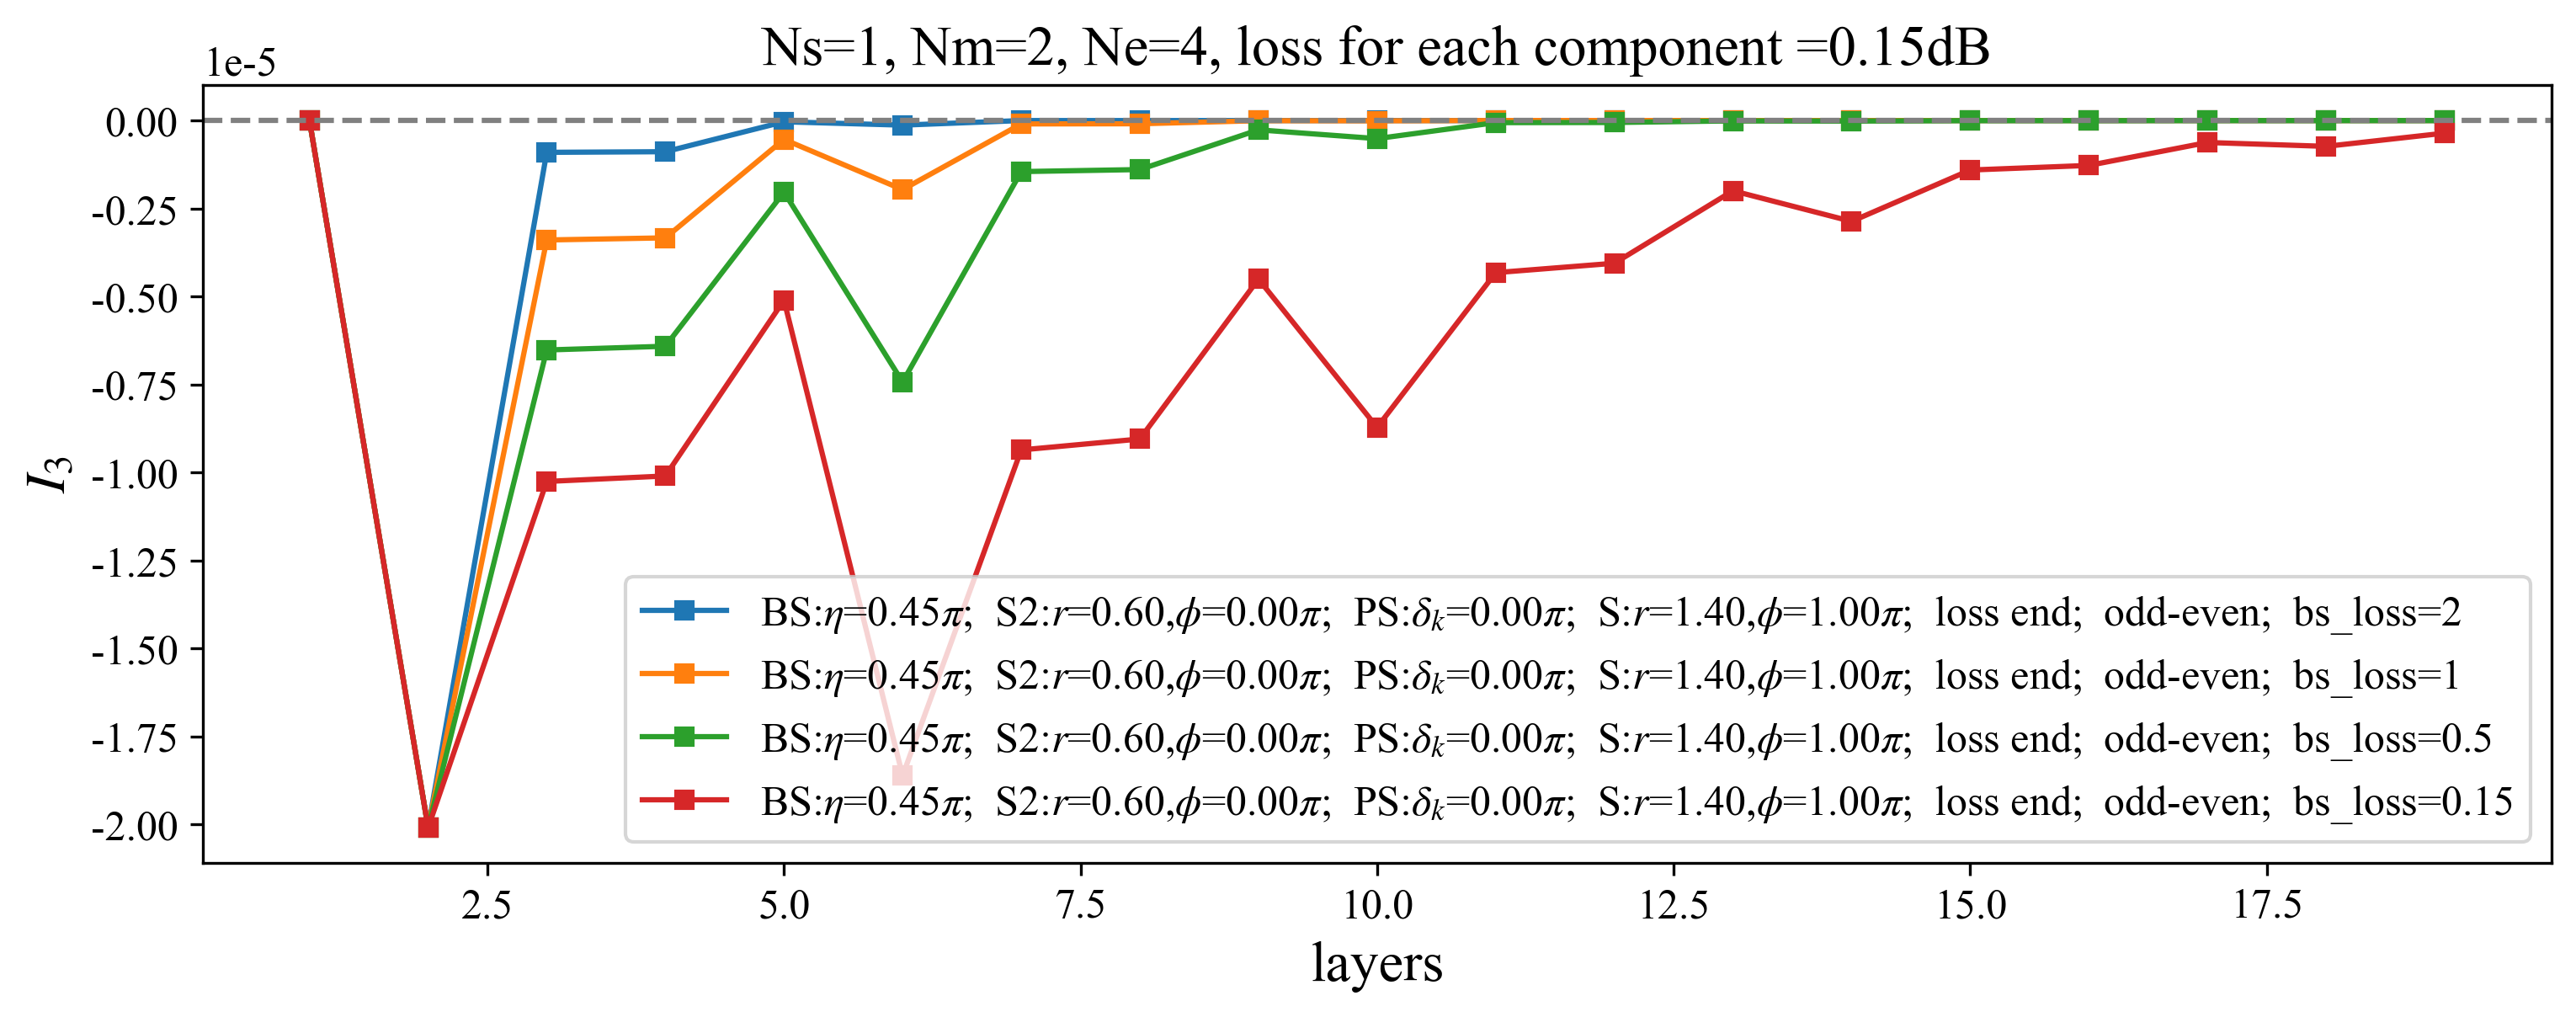

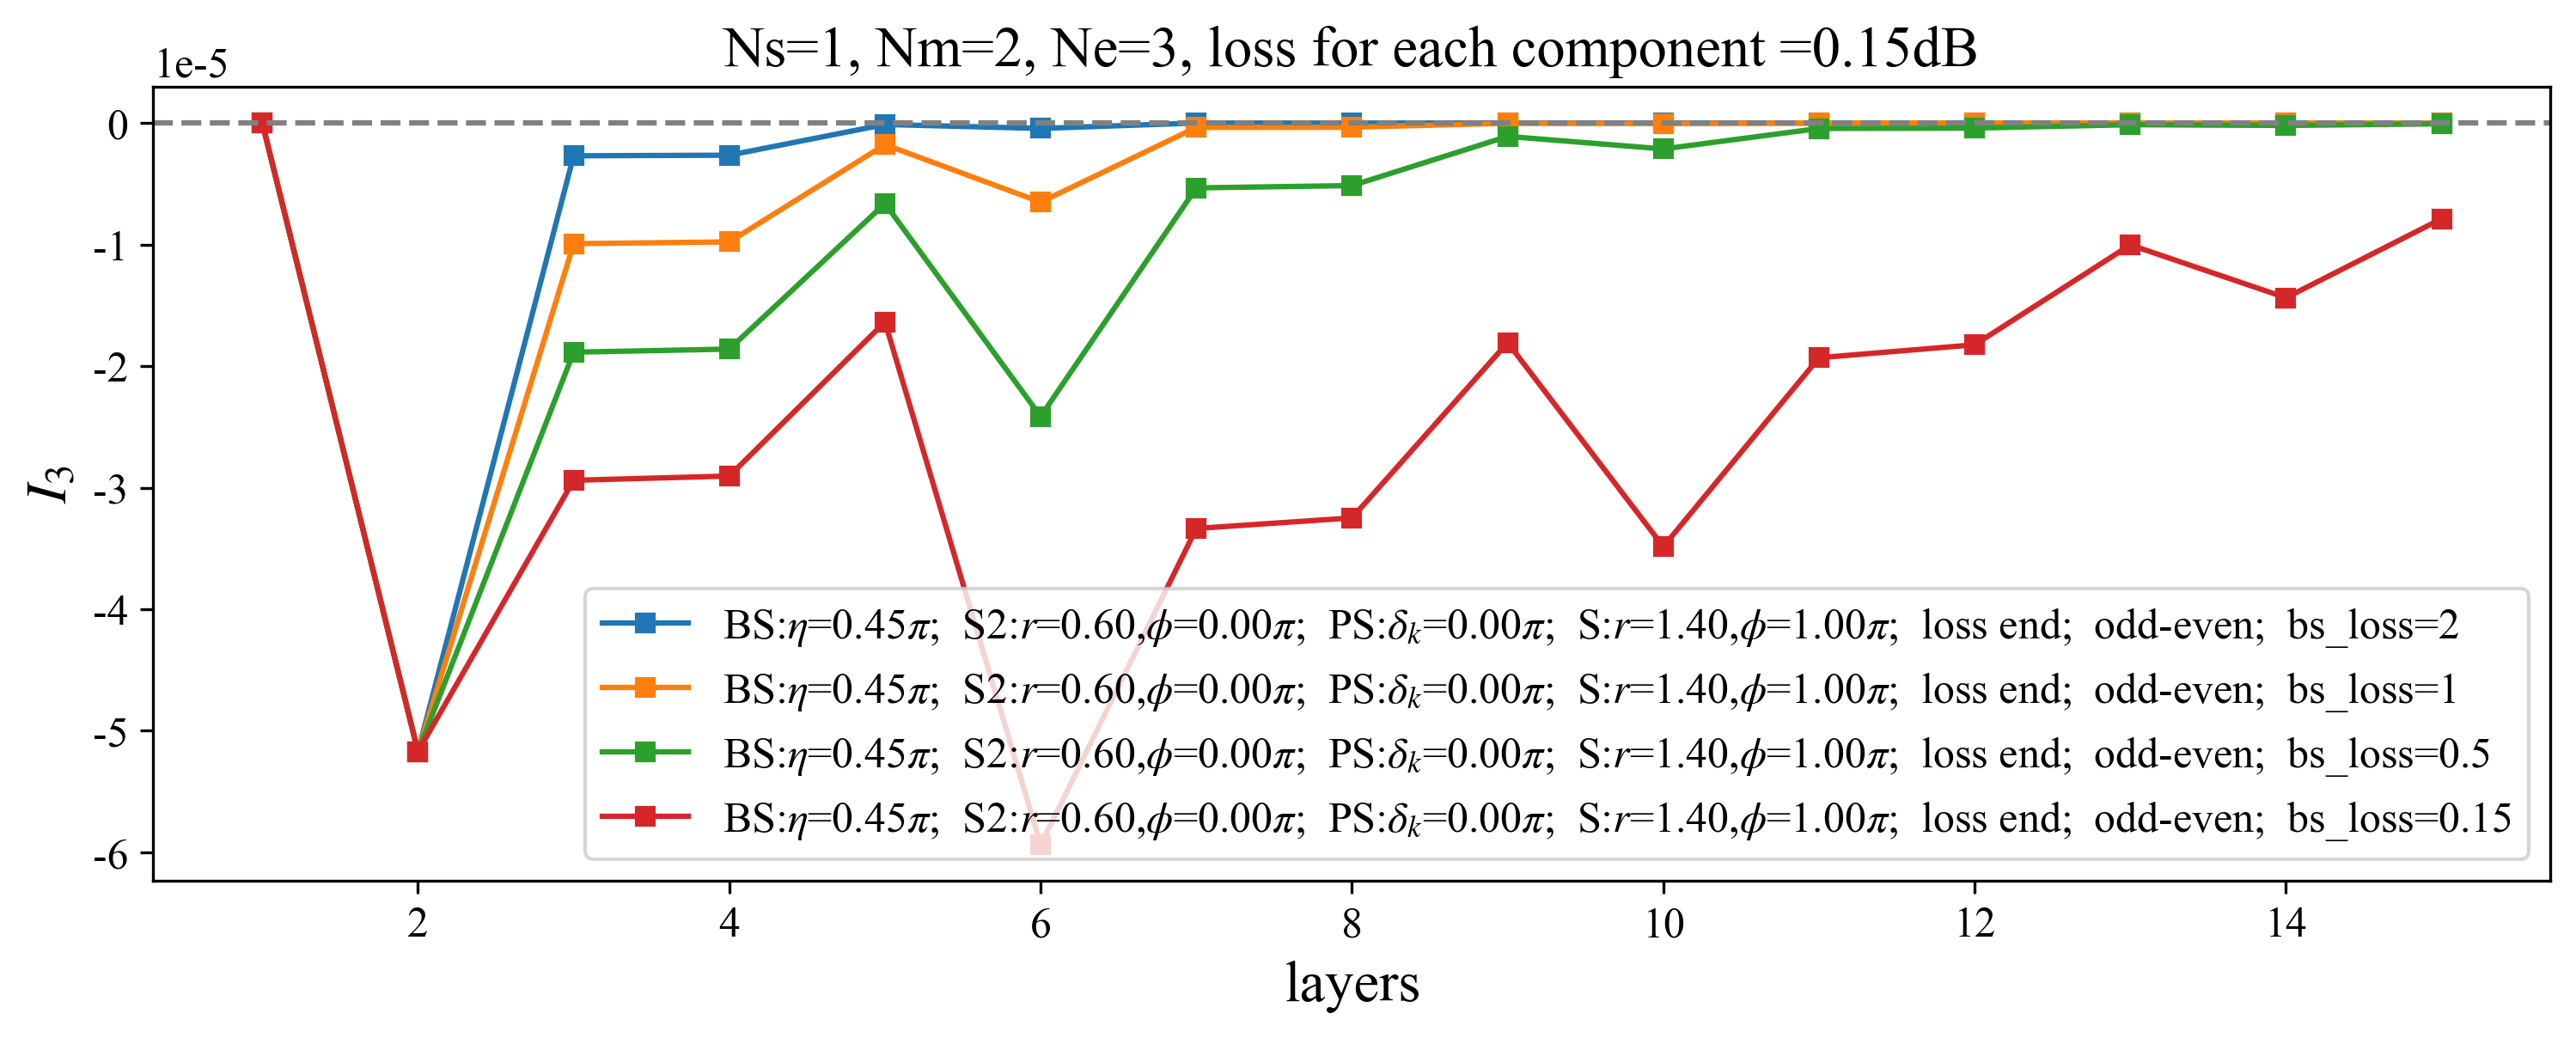

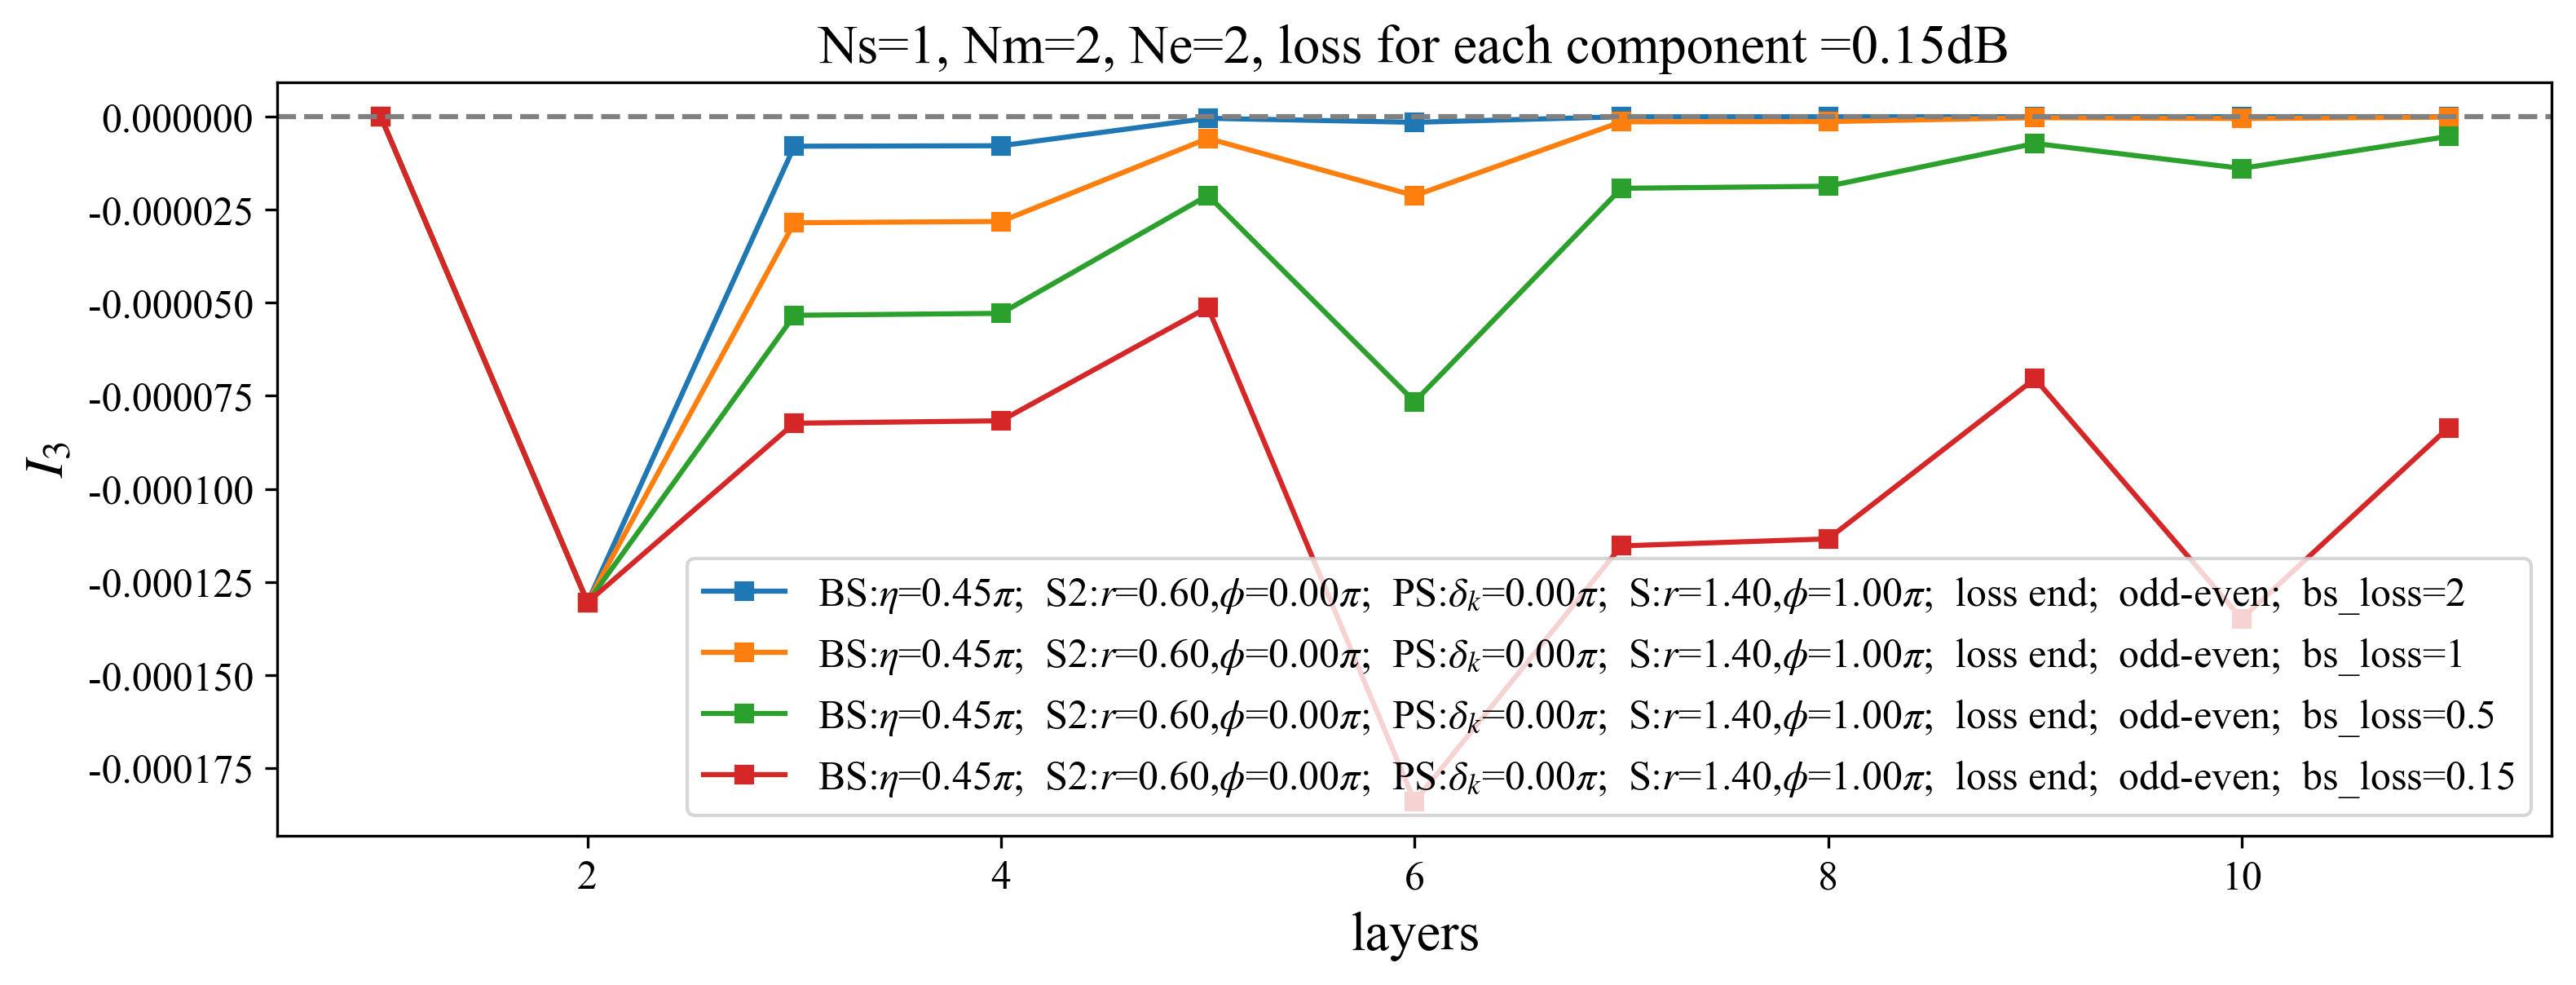

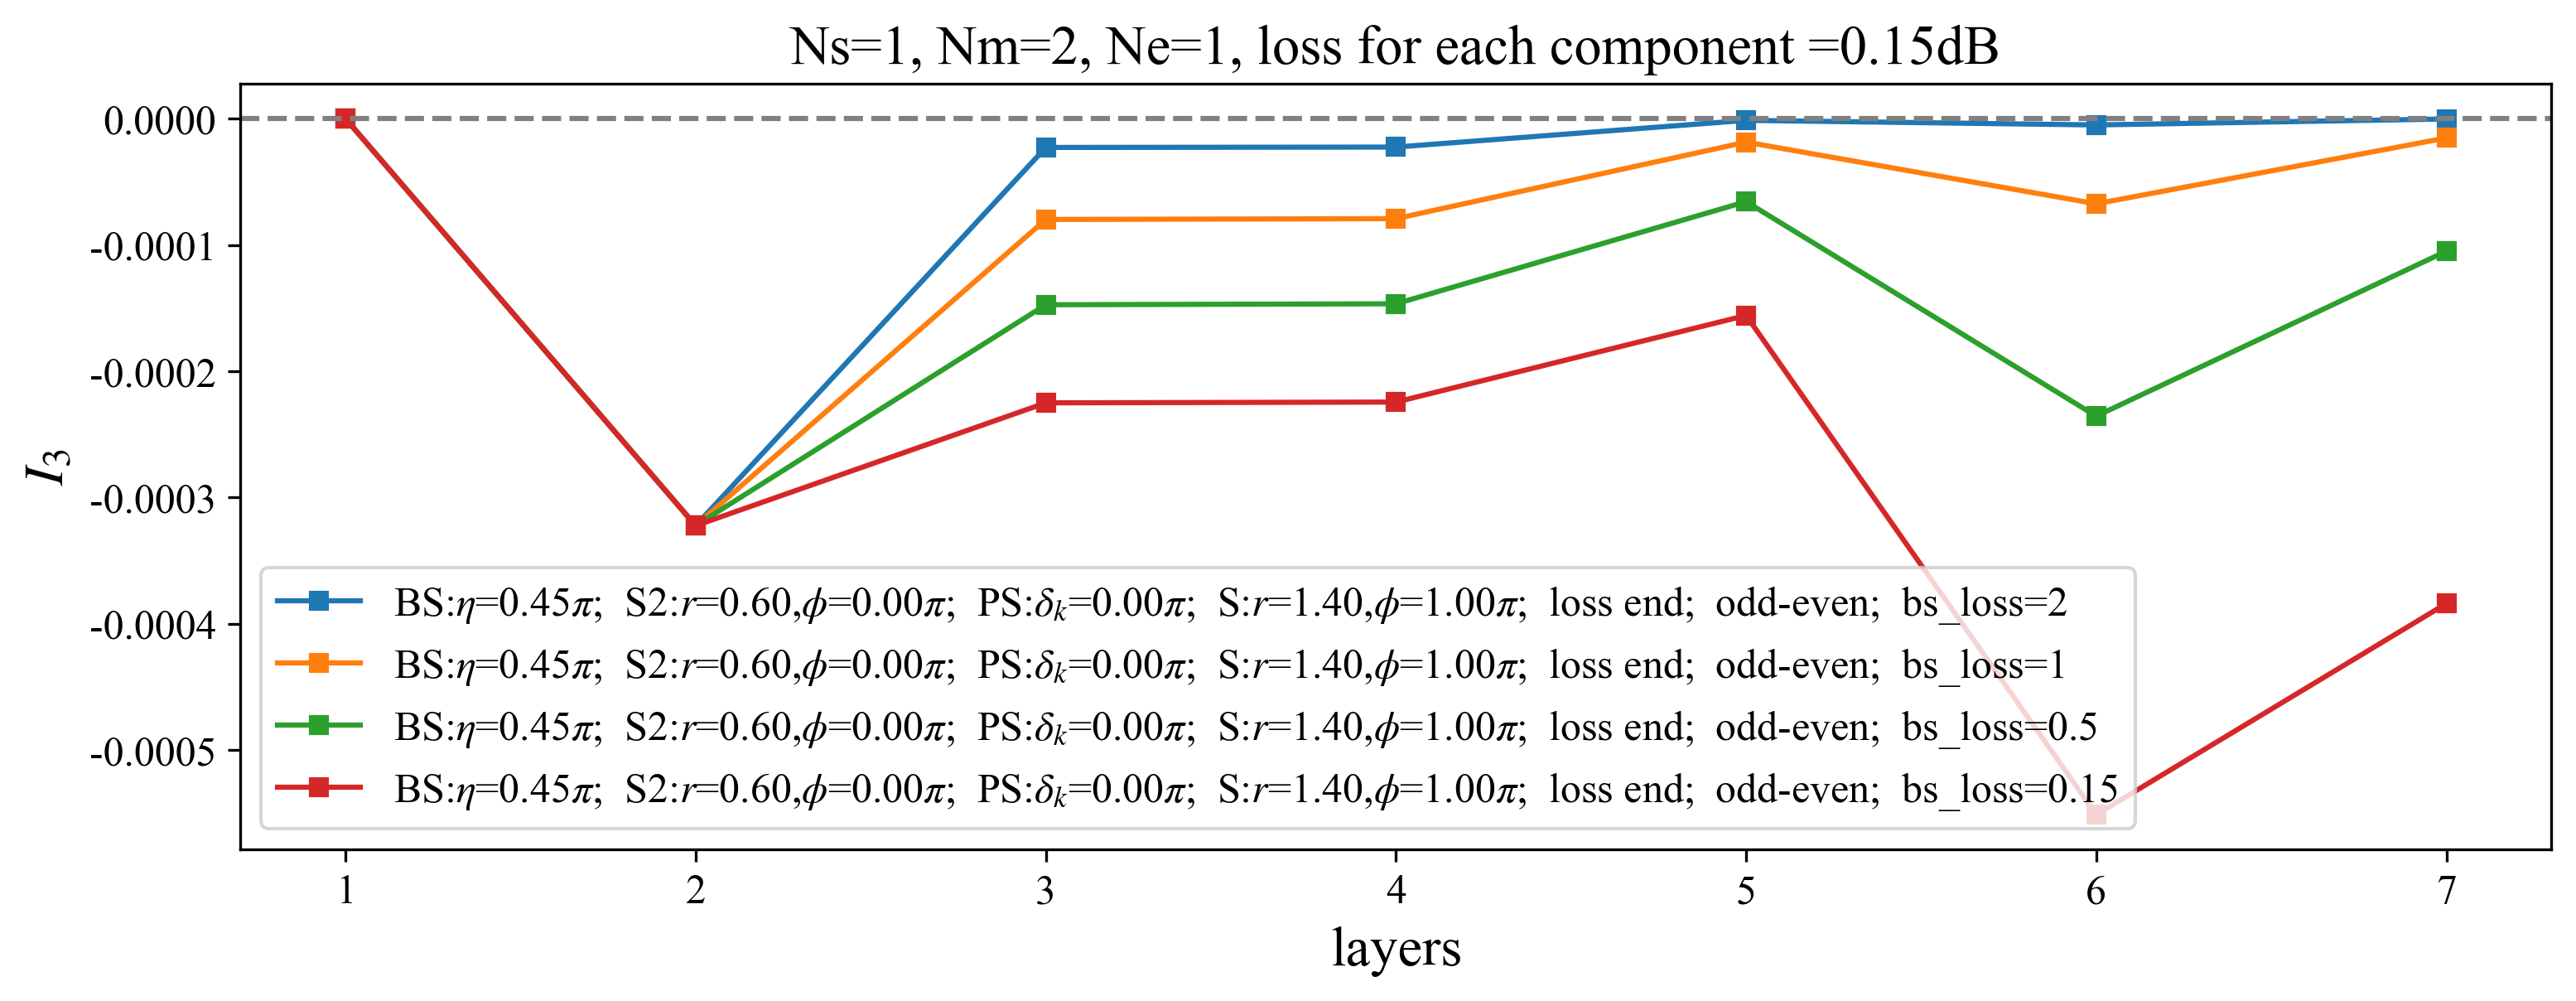

In [29]:
for NL in [5,4,3,2,1]:
    # scale
    Ns: int = 1
    Nm: int = 2
    # NL: int = 5
    n_modes = Ns + Nm + NL
    layers = 4*(Nm+NL) - 5

    # BS
    eta: float = np.pi * 0.45
    eta_list = [eta]

    # S2
    s_r: float = 0.6
    s_phi: float = 0
    s_r_list = [s_r]

    # PS 
    delta_k: float = 0

    # S
    r_k: float = 1.4
    phi_k: float = np.pi   # 取非零的那个
    r_k_list = [r_k]

    # loss
    if_add_loss: bool = False
    if_loss_input : bool = False
    loss_amplitude_bs : float = 2
    loss_input : np.array = None


    # load array from excel
    import pandas as pd
    df = pd.read_excel('loss_8_mode.xlsx')
    loss_input = df.values


    # additonal features
    if_odd_even: bool = True
    if_part_computing: bool = True
    part_computing_layers: int = np.arange(4*(Nm+NL) - 5) + 1

    if_uncertain_params: bool = False
    uncertain_percentage: float = 0.05


    I3 = np.zeros(len(part_computing_layers))


    plt.figure(figsize=(12, 4), dpi=300)
    ################################


    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 2
    if_loss_end: bool = True
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i],      # additonal features
            if_loss_end=if_loss_end
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$;  loss end".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'        
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 1
    if_loss_end: bool = True

    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i],      # additonal features
            if_loss_end=if_loss_end
        
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$;  loss end".format(delta_k/np.pi, r_k, phi_k/np.pi)
    
    if if_odd_even:
        tittle += r';  odd-even'        
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 0.5
    if_loss_end: bool = True
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i],     # additonal features
            if_loss_end=if_loss_end
        
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$;  loss end".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'      
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    ################################
    if_add_loss: bool = True
    loss_amplitude_bs : float = 0.15
    if_loss_end: bool = True
    ################################

    for i in range(len(part_computing_layers)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL,  # scale
            eta=eta,              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=True, loss_amplitude_bs=loss_amplitude_bs,    # loss
            if_odd_even=True,     # additonal features
            if_part_computing=True, part_computing_layers=part_computing_layers[i],      # additonal features
            if_loss_end=if_loss_end
        
        )
        a.compute()
        I3[i] = a.I3()

    tittle = r"BS:$\eta$={:.2f}$\pi$;  S2:$r$={:.2f},$\phi$={:.2f}$\pi$;  ".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS:$\delta_k$={:.2f}$\pi$;  S:$r$={:.2f},$\phi$={:.2f}$\pi$;  loss end".format(delta_k/np.pi, r_k, phi_k/np.pi)

    if if_odd_even:
        tittle += r';  odd-even'     
    if if_add_loss:
        tittle += r';  bs_loss={}'.format(loss_amplitude_bs)

    plt.plot(part_computing_layers, I3, 
                label=tittle,
                marker='s', markersize=5)
    plt.legend()

    ################################

    # # 加水平横线
    plt.axhline(y=0, color='gray', linestyle='--')
    # plt.axvline(x=5, color='gray', linestyle='--')

    plt.xlabel(r'layers', fontsize=16)
    plt.ylabel(r'$I_3$', fontsize=16)
    plt.legend()
    plt.title(r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15), fontsize=16)
    savename =  r'Ns={}, Nm={}, Ne={}, loss for each component ={:.2f}dB'.format(Ns, Nm, NL, 0.15) +\
                r"BS--eta={:.2f}pi-S2--r={:.2f}-phi={:.2f}pi-".format(eta/np.pi, s_r, s_phi/np.pi) + \
                r"PS--delta_k={:.2f}pi-S--r={:.2f}-phi={:.2f}pi".format(delta_k/np.pi, r_k, phi_k/np.pi) + \
                r'-bs_loss={:.1f}-loss-end'.format(loss_amplitude_bs)   
    plt.savefig(r'pic3/'+savename+r'.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

